In [449]:
#This is the last step to update Table of Contents for a better structure. We do not need this in the assignment
import nbformat

# Load the notebook
with open("Credit EDA assignment.ipynb", "r", encoding="utf-8") as notebook_file:
    notebook_content = nbformat.read(notebook_file, as_version=4)

# Create a list to store the TOC entries
toc = []

# Iterate through the notebook cells to find Markdown headings
for cell in notebook_content.cells:
    if cell.cell_type == "markdown":
        source_lines = cell.source.splitlines()
        if source_lines[0].strip().startswith("#"):
            # Extract the heading level and text
            heading_level = source_lines[0].count("#")
            heading_text = source_lines[0].strip("#").strip()
            # Create a TOC entry with indentation
            toc_entry = f"{'  ' * (heading_level - 1)}- [{heading_text}](#{heading_text.lower().replace(' ', '-')})"
            toc.append(toc_entry)

# Join the TOC entries into a single string
toc_markdown = "\n".join(toc)

# Insert the TOC at the beginning of the notebook
notebook_content.cells.insert(0, nbformat.v4.new_markdown_cell(toc_markdown))

# Save the updated notebook
with open("your_notebook_with_toc.ipynb", "w", encoding="utf-8") as output_file:
    nbformat.write(notebook_content, output_file)

# Table of content
- [1. Import all the libraries necessary for the Assignment](#1.-import-all-the-libraries-necessary-for-the-assignment)
- [1.1. Analyze the data](#1.1.-analyze-the-data)
  - [1.1.1. Analyze the dataset 1- 'application_data.csv'](#1.1.1.-analyze-the-dataset-1--'application_data.csv')
- [2. Data Cleaning & Manipulating](#2.-data-cleaning-&-manipulating)
    - [2.1.1. Cleaning columns with Null values more than 50%](#2.1.1.-cleaning-columns-with-null-values-more-than-50%)
    - [2.1.2. Drop the columns with null values more than 15%](#2.1.2.-drop-the-columns-with-null-values-more-than-15%)
- [2.2. Analyze and removing unnecessary column data](#2.2.-analyze-and-removing-unnecessary-column-data)
    - [2.2.2. Check the FLAGS columns and their relationship with TARGET columns](#2.2.2.-check-the-flags-columns-and-their-relationship-with-target-columns)
- [3. Imputing values](#3.-imputing-values)
  - [3.2. Imputing the other 6 columns](#3.2.-imputing-the-other-6-columns)
- [4. Standardizing values](#4.-standardizing-values)
  - [4.1. Standardizing AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE](#4.1.-standardizing-amt_income_total,-amt_credit,-amt_goods_price)
  - [4.2. Standardizing DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE columns](#4.2.-standardizing-days_birth,-days_employed,-days_registration,-days_id_publish,-days_last_phone_change-columns)
- [5. Identify Outliers](#5.-identify-outliers)
- [6. Converting desired columns from Object to categorical column](#6.-converting-desired-columns-from-object-to-categorical-column)
- [Data set 2:](#data-set-2:)
- [7 Find Outliers](#7-find-outliers)
- [6. Analyzing data](#6.-analyzing-data)
  - [6.1. Imbalance Data](#6.1.-imbalance-data)
  - [6.2. Plotting Functions](#6.2.-plotting-functions)
  - [6.3. Categorical Variable Analysis](#6.3.-categorical-variable-analysis)
    - [6.3.2 Categorical Bivariate or multivariate analysis](#6.3.2-categorical-bivariate-or-multivariate-analysis)
    - [6.3.3 Numeric Variables Analysis](#6.3.3-numeric-variables-analysis)
    - [6.3.4. Numerical Univariate Analysis](#6.3.4.-numerical-univariate-analysis)
    - [6.3.4. Numerical bivariate analysis](#6.3.4.-numerical-bivariate-analysis)
- [7. Merged dataframe analysis](#7.-merged-dataframe-analysis)
- [8. Conclusion](#8.-conclusion)

# 1. Import all the libraries necessary for the Assignment

In [276]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
# set to display all rows and columns to have a better look at the data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)
pd.set_option('display.expand_frame_repr', False)

# 1.1. Analyze the data

## 1.1.1. Analyze the dataset 1- 'application_data.csv'

In [278]:
# Import the dataset 'application_data.csv'
appl_data = pd.read_csv('application_data.csv')

In [279]:
# check the dataset info and shape
appl_data.shape

(307511, 122)

In [280]:
appl_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Key takeaways:
- 122 columns
- 307511 rows
- Various type of data

In [281]:
# Check the numeric data of the dataset
appl_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [282]:
appl_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

Keys takeaway from the numeric dataset situations:
- 04 columns describe Date/time (days_birth,das_employed,days_registration,days-id_publish) have a negative values. Fixing needed.
- NaN values, filling needed.

# 2. Data Cleaning & Manipulating
## 2.1. Check the null values

In [283]:
# checking the number of null values in each column
# create a function to find null values for the dataframe

def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2) #return round to round % number to 2 digits after the decimal .
null_values(appl_data)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### 2.1.1. Cleaning columns with Null values more than 50%

In [284]:
# create a variables to store columns have missing values more than 50%
null_col_50 = null_values(appl_data)[null_values(appl_data)>50]
print(null_col_50)
print('Number of columns have more than 50% null is: ',len(null_col_50))

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

Key takeaway:
- We have 41 columns have the missing values more than 50%, mostly related to the area and properties of the apartment owned/rented by the loan applicant

In [285]:
# show all column name will be dropped
null_col_50.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'], dtype='object')

In [286]:
#Drop those column
appl_data.drop(columns=null_col_50.index,inplace =True)

In [287]:
appl_data.shape

(307511, 81)

- Before: 122 cols.
- After: 81 cols (drop 41 above)

### 2.1.2. Drop the columns with null values more than 15%

In [288]:
# create a variables to store columns with more than 15% null values
null_col_15 = null_values(appl_data)[null_values(appl_data)>15]
print(null_col_15)
print('Total of columns have more than 15% null values is: ',len(null_col_15) )

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64
Total of columns have more than 15% null values is:  10


Based on the Column dictionary, we can see that only 'OCCUPATION_TYPE' and 'EXT_SOURCE_3' are relevant to the 'TARGET' column, and can be used. So we drop all the others column except these 2 columns.

In [289]:
# Removing 2 columns we keep from the list, so we can drop all the others column from the dataset
null_col_15.drop(['OCCUPATION_TYPE','EXT_SOURCE_3'],inplace=True)

In [290]:
print(null_col_15)
print('Number of unrelated columns data:', len(null_col_15))

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64
Number of unrelated columns data: 8


In [291]:
# Removing those unrelated data from the dataset
appl_data.drop(null_col_15.index,axis=1,inplace=True)

axis=1: This parameter specifies the axis along which the drop operation should be performed. In pandas, axis=1 indicates that you want to drop columns. This means that you are removing entire columns from the DataFrame, not rows.

inplace=True: When inplace is set to True, the drop operation is applied directly to the DataFrame appl_data, and it modifies the DataFrame in place. This means that the original DataFrame appl_data will be altered, and there is no need to assign the result back to appl_data.

In [292]:
appl_data.shape

(307511, 73)

Key Takeaways:
- After drop 8 cols, we have 73 cols left
- There are 2 columns with more than 15% null values, which is 'OCCUPATION_TYPE' and 'EXT_SOURCE_3'

In [293]:
null_values(appl_data).head(15)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

# 2.2. Analyze and removing unnecessary column data
## 2.2.1. Normalize data columns

We check the EXT_SOURCE_2 and EXT_SOURCE_3  first. As they have the normalize values, we analyze the relationship between these two with the TARGET column. If it is correlated, we can keep it. Otherwise, we consider to drop it to cleaning the data

In [294]:
ext_check = ['EXT_SOURCE_2','EXT_SOURCE_3'] #store the EXT column in 1 variable

Text(0.5, 1.0, 'Correlation between 2 EXT columns and TARGET column')

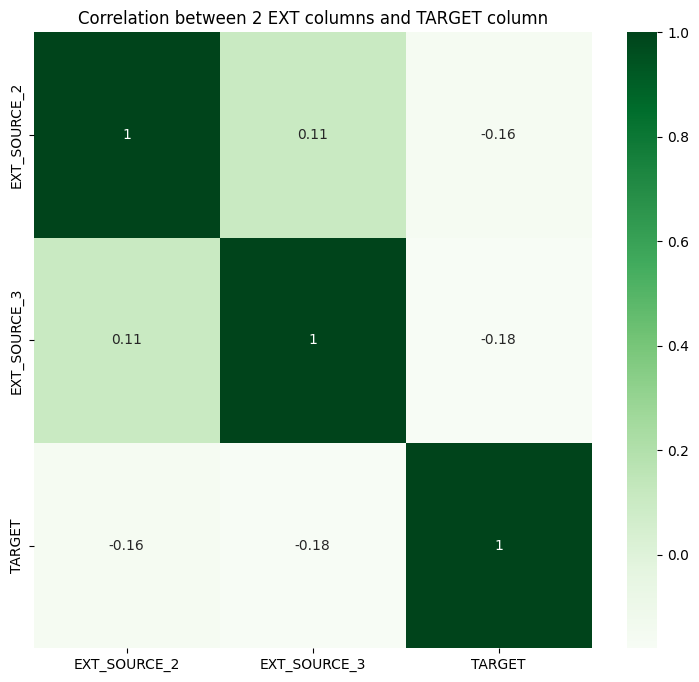

In [295]:
#create a heatmap to see the correlation
plt.figure(figsize=[9,8]) #width and height
sns.heatmap(appl_data[ext_check+['TARGET']].corr(),cmap='Greens',annot=True)
plt.title('Correlation between 2 EXT columns and TARGET column')

Key takeaways:
- No correlation between EXT_SOURCE_2 and EXT_SOURCE_3 with TARGET, since their correlation with TARGET column is negative (<1)

In [296]:
# No correlation, so we drop these 2 columns
appl_data.drop(ext_check,axis=1,inplace=True)

In [297]:
appl_data.shape

(307511, 71)

Now only 71 columns left in the dataset

In [298]:
null_values(appl_data)

OCCUPATION_TYPE                31.35
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
L

### 2.2.2. Check the FLAGS columns and their relationship with TARGET columns
As can be seen from above, the FLAGS columns has 0% of null values, so we can check whether they have correlation with the TARGET column or not

In [299]:
# Group all the FLAGS column in 1 variables
flag_cols = [col for col in appl_data.columns if 'FLAG' in col]
flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [300]:
# create flag_target dataframe which has the FLAGS column and the TARGET column
flag_target = appl_data[flag_cols+['TARGET']]

We categorize TARGET column data:
- 1 as Defaulter
- 0 as Repayer

In [301]:
flag_target['TARGET'] = flag_target['TARGET'].replace({1: 'Defaulter',0:'Repayer'})

As the column dictionary shows, FLAGS columns have:
- 1 is Yes (Y)
- 0 is No (N)
\
So We grouping these values as Y and N for better visualization

In [302]:
for i in flag_target:
    if i!= 'TARGET':
        flag_target[i] = flag_target[i].replace({1:'Y',0:'N'})
        

In [303]:
flag_target.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21     TARGET
0            N               Y          Y              Y               N                Y          Y          N               N               Y               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N  Defaulter
1            N               N          Y              Y               N                Y          Y          N               N               Y               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer
2            Y               Y          Y              Y               Y                Y          Y          N               N               N               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer
3            N               Y          Y              Y               N                Y          N          N               N               Y               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer
4            N               Y          Y              Y               N                Y          N          N               N               N               N               N               N               N               Y               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer

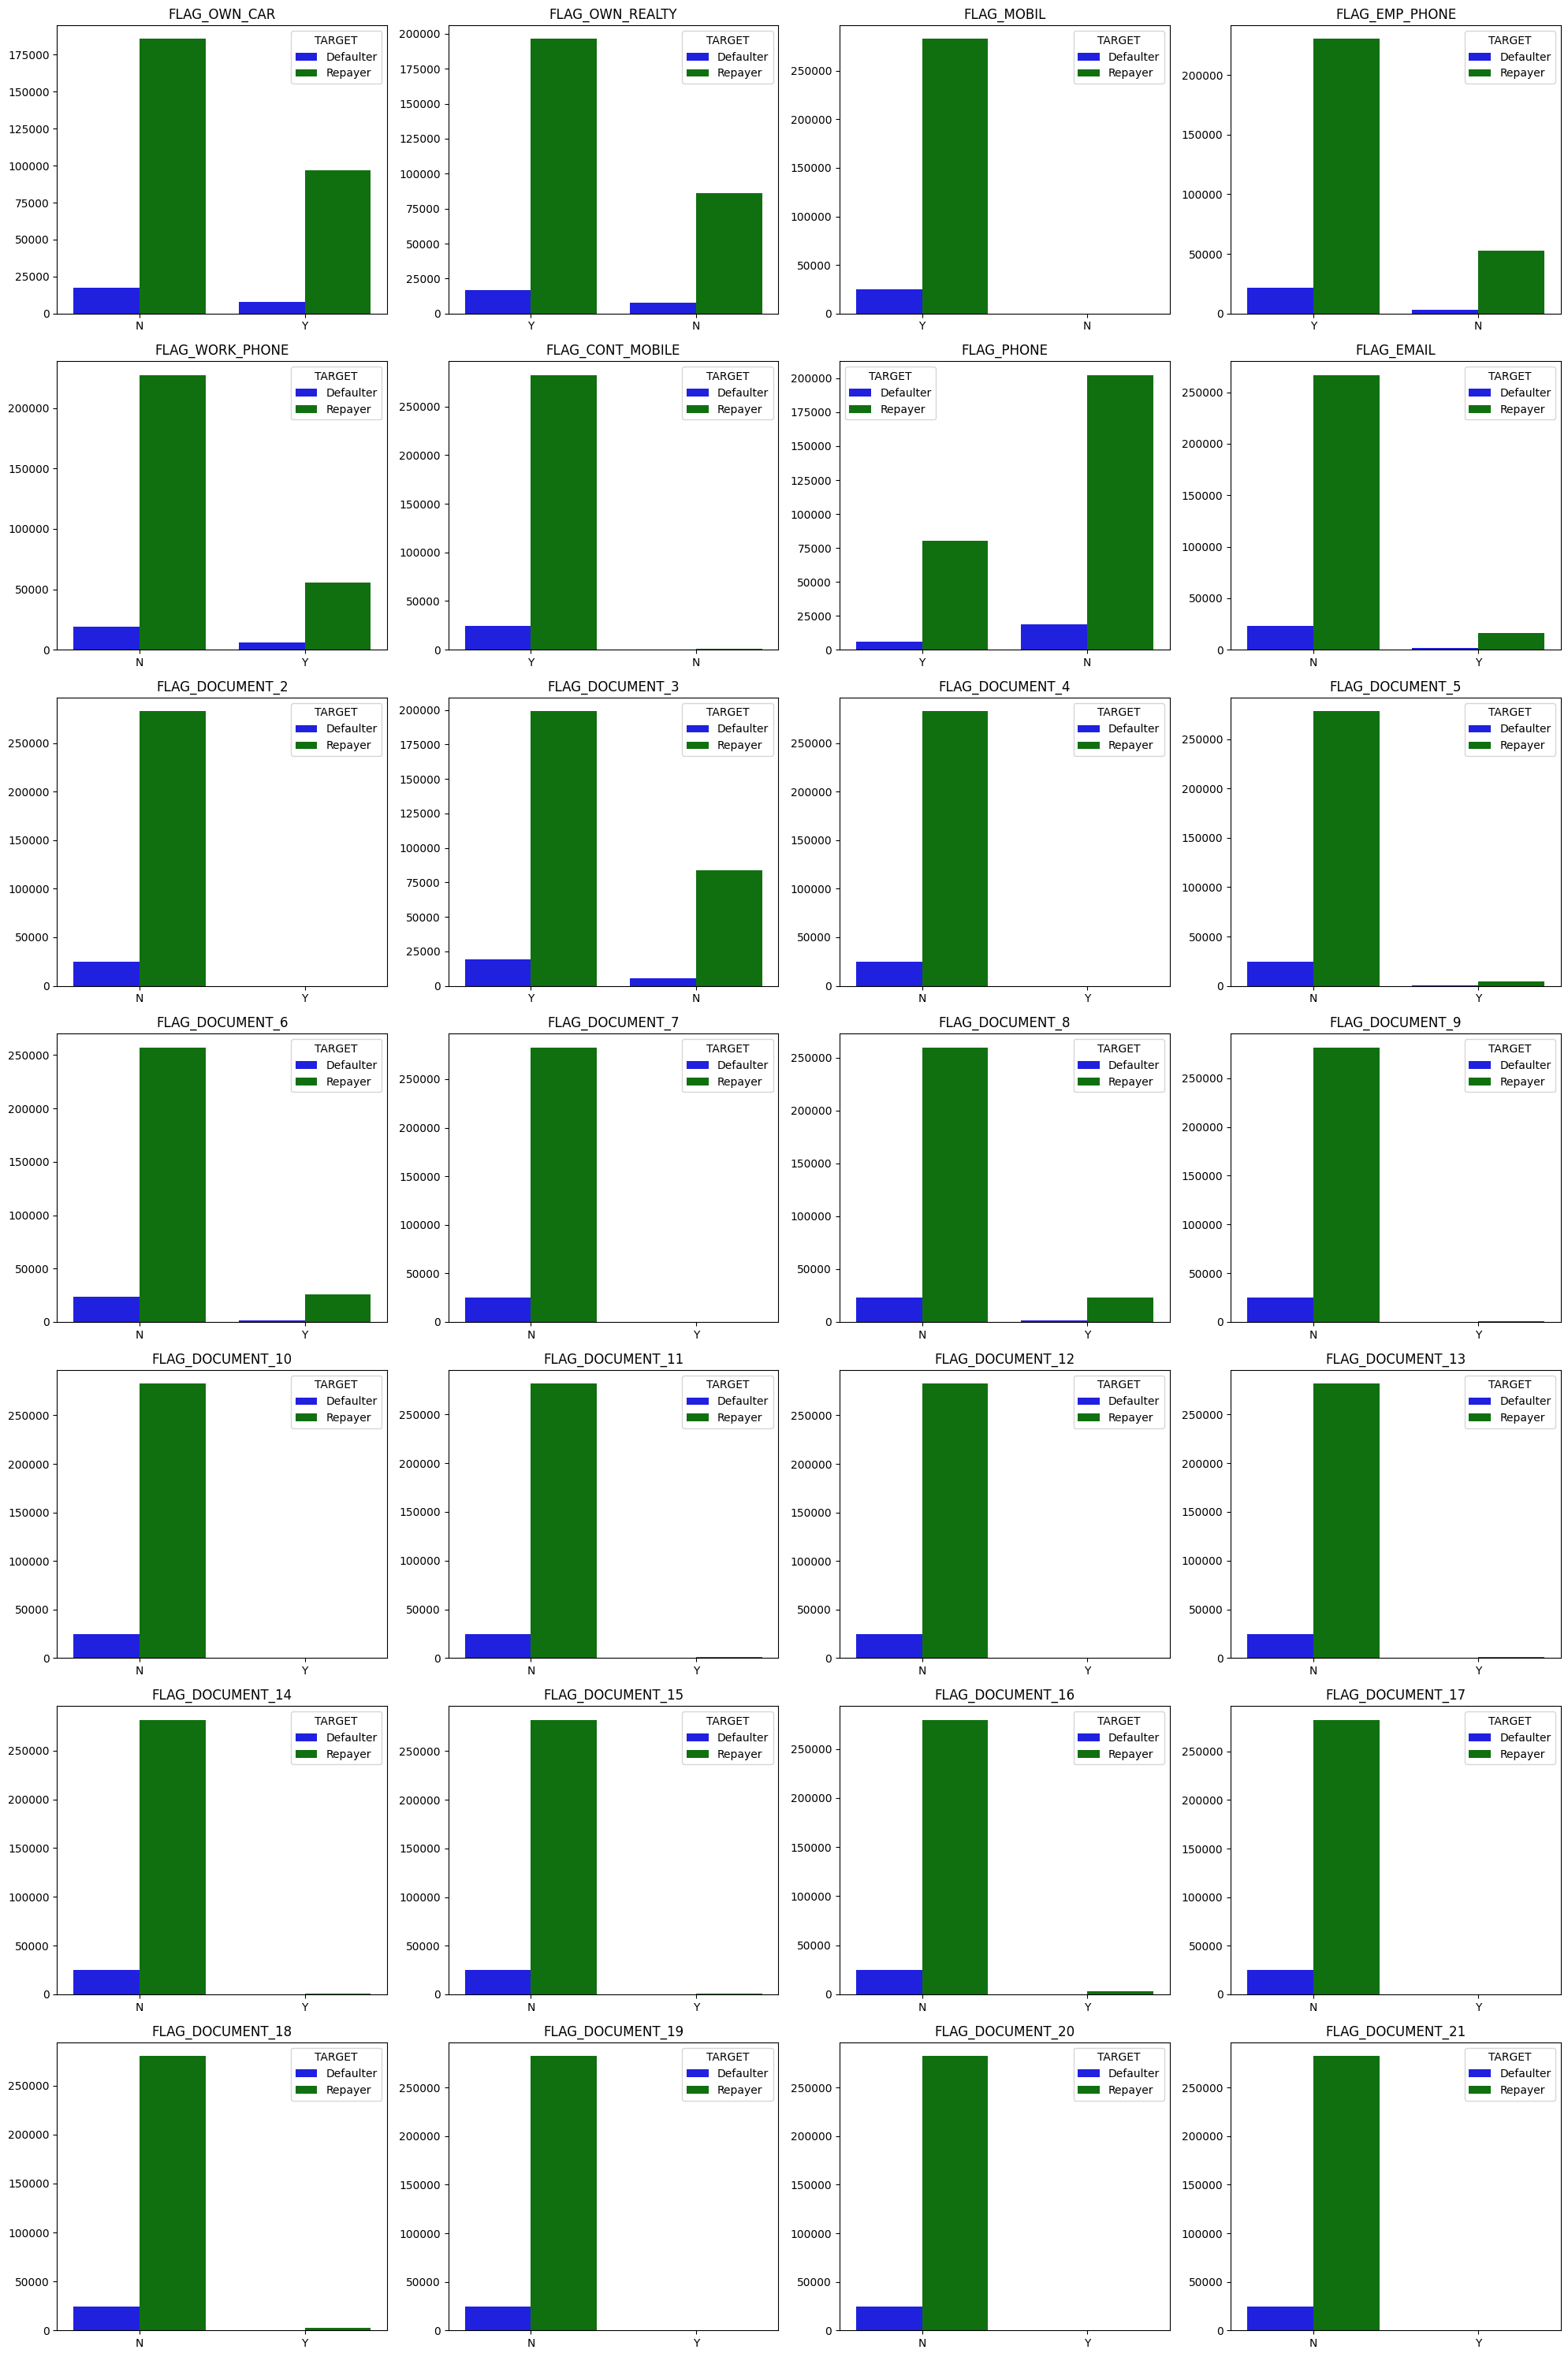

In [304]:
import warnings # turn off the warnings first
warnings.filterwarnings("ignore")
import itertools #using this for efficient looping, or we have to draw each FLAGS column with TARGET col in subplot
# Plotting all the FLAG columns and TARGET to find the correlation (if occurs)

plt.figure(figsize=[20,30])
for i, j in itertools.zip_longest(flag_cols, range(len(flag_cols))):
    plt.subplot(7, 4, j + 1)
    ax = sns.countplot(x=flag_target[i], hue=flag_target['TARGET'], palette=['b', 'g'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(i)

plt.tight_layout()
plt.show()

**Explain the method**:
- plt.figure(figsize=[20, 30]): This line uses Matplotlib's figure() function to create a new figure for your plots. It sets the figure size to 20 inches in width and 30 inches in height. This figure serves as the canvas for your subplots.

- for i, j in itertools.zip_longest(flag_cols, range(len(flag_cols))):: This line starts a for loop that iterates over pairs of values. It uses the zip_longest function from the itertools module to iterate over elements from flag_cols (presumably a list of column names) and the range of the length of flag_cols. This loop pairs each column name (i) with its corresponding index (j).

- plt.subplot(7, 4, j + 1): Inside the loop, this line creates a subplot within the figure. The subplot() function is used to specify the grid layout of subplots in rows and columns. In this case, 7, 4 indicates that you want a grid of 7 rows and 4 columns, and j + 1 specifies the position of the current subplot within that grid. It iterates through all possible positions for the subplots.

- ax = sns.countplot(x=flag_target[i], hue=flag_target['TARGET'], palette=['r', 'g']): In each subplot, this line uses Seaborn's countplot() function to create a countplot. It counts the occurrences of unique values in the column specified by x=flag_target[i] (presumably one of the flag columns). The hue=flag_target['TARGET'] parameter colors the bars based on the values of the 'TARGET' column, with 'r' (red) for one category and 'g' (green) for the other.

- ax.set_xlabel('') and ax.set_ylabel(''): These lines remove the x-axis and y-axis labels from each subplot by setting them to empty strings (''). This can be useful for improving the appearance of the plot when you only want to show the title and not the axis labels.

- ax.set_title(i): This line sets the title of each subplot to the current flag column name (i), which corresponds to the column being plotted.

- plt.tight_layout(): This line is used to automatically adjust the spacing and layout of subplots so that they do not overlap and fit nicely within the figure.

- plt.show(): Finally, this line displays the entire figure with all the subplots. This is where you'll see the grid of countplots, each showing the distribution of a flag column with respect to the 'TARGET' variable.

**Insight (TBD)**:
These columns:
- FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3 have the number of Repayer which provided materials (Y) is more than defaulter, so we keep these columns to look deeper.
- To sum up from the Columns Dictionary, we just need to keep the FLAG_MOBIL (only need the mobile phone),FLAG_OWN_REALTY,FLAG_DOCUMENT_3 for further analysis.
- The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [305]:
# Remove required columns from the flag_target so we can drop all the column in this dataframe from the dataset
flag_target.drop(['TARGET','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_DOCUMENT_3'],axis=1,inplace=True)

In [306]:
len(flag_target.columns)

25

In [307]:
# Drop the columns in flag_target from the dataset
appl_data.drop(flag_target.columns,axis=1,inplace=True)

In [308]:
appl_data.shape

(307511, 46)

After removing all unnecessary columns, the dataset now have 46 columns

# 3. Imputing values
After we removed all the unnecessary columns, we will continue by imputing values for the missing values in the the columns

In [309]:
# Find the misisng values first
null_values(appl_data)

OCCUPATION_TYPE                31.35
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
HOUR_APPR_PROCESS_START         0.00
ORGANIZATION_TYPE               0.00
LIVE_CITY_NOT_WORK_CITY         0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
FLAG_DOCUMENT_3                 0.00
REG_REGION_NOT_WORK_REGION      0.00
REG_REGION_NOT_LIVE_REGION      0.00
SK_ID_CURR                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
R

Key takeaways:
- We have 7 columns that have null values greater than 1%
- These columns will be imputed for further analysis: 
     - OCCUPATION_TYPE
     - AMT_REQ_CREDIT_BUREAU_YEAR
     - AMT_REQ_CREDIT_BUREAU_QRT
     - AMT_REQ_CREDIT_BUREAU_MON      
     - AMT_REQ_CREDIT_BUREAU_WEEK     
     - AMT_REQ_CREDIT_BUREAU_DAY      
     - AMT_REQ_CREDIT_BUREAU_HOUR     
## 3.1. Imputing the 'Occupation_Type' column

In [310]:
# We look at the percentage of each category in the 'Occupation_type' columns
appl_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

We see that in the OCCUPATION_TYPE column has 31.35% of null values. In order to have a better look at these null values, we create another variable to store all these null values

In [311]:
# Create a 'Unknown' variable to store the null values
appl_data['OCCUPATION_TYPE'] = appl_data['OCCUPATION_TYPE'].fillna('Unknown')

In [312]:
# Check to see whether all the null values are stored into the 'Unknown' or not
appl_data['OCCUPATION_TYPE'].isnull().sum()

0

Text(0.5, 1.0, 'Percentage of Occupations')

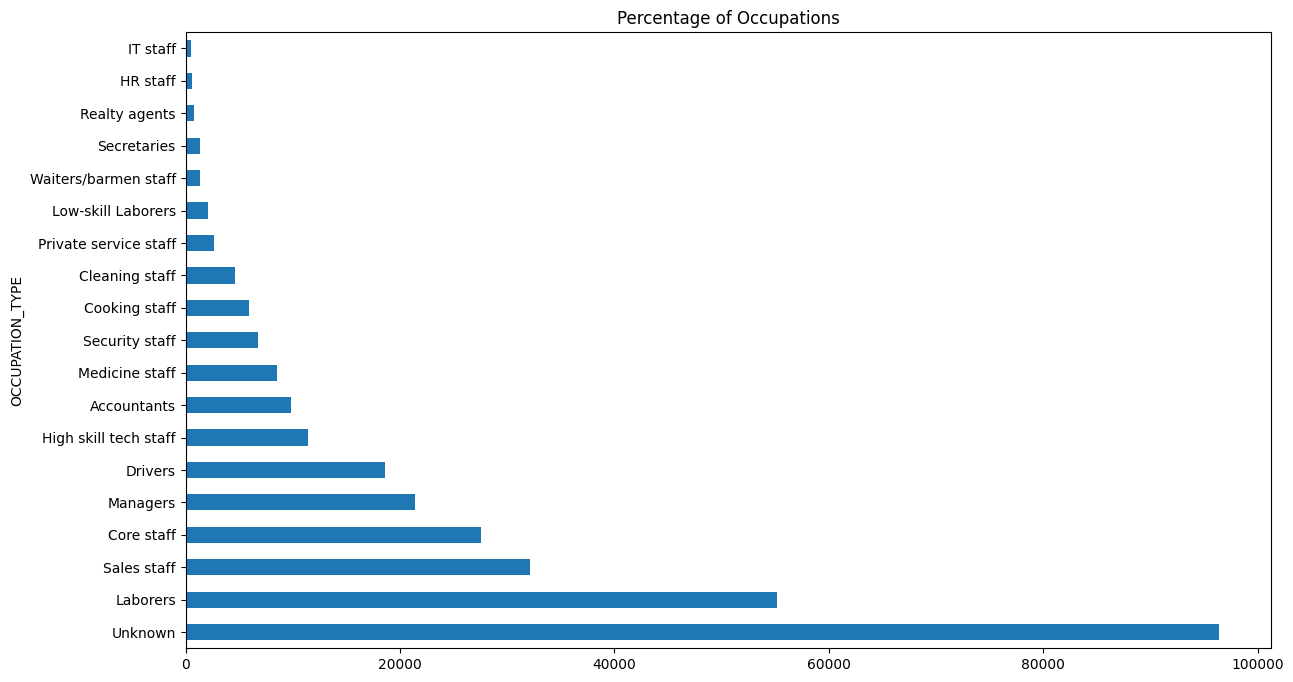

In [313]:
# So we see the null value of this column is now 0
# We now visualize the category of the data in 'OCCUPATION_TYPE'
plt.figure(figsize=[14,8])
(appl_data['OCCUPATION_TYPE'].value_counts()).plot.barh()
plt.title('Percentage of Occupations')

- Unknown group has the highest number of values
- Laborers ranked second

## 3.2. Imputing the other 6 columns
- AMT_REQ_CREDIT_BUREAU_YEAR
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR

In [314]:
appl_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR
count               265992.000000              265992.000000              265992.000000               265992.000000              265992.000000               265992.000000
mean                     1.899974                   0.265474                   0.267395                    0.034362                   0.007000                    0.006402
std                      1.869295                   0.794056                   0.916002                    0.204685                   0.110757                    0.083849
min                      0.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
50%                      1.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
75%                      3.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
max                     25.000000                 261.000000                  27.000000                    8.000000                   9.000000                    4.000000

These columns above represent the number of enquries made for the customer, which should be discrete, not continous. We can see that all values are numerical, no negative values or letter values, so for imputing missing values, we should not use the mean as it is in the decimal form, we should use median instead, for the following reasons:
- The mean is a more sensitive measures of central tendency than the median, so it is more affected by outliers
- Outlies are more likely to occurs in decimal data 
- If we impute missing values in decimal data using the mean, outliers can have a significant impact on the imputed values. So using the median will less likely introduces bias into data


In [315]:
# Creating variables to store all 6 AMT columns
amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [316]:
# filling the missing values with median
appl_data.fillna(appl_data[amt_credit].median(),inplace=True)

In [317]:
null_values(appl_data)

NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
ORGANIZATION_TYPE              0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION    0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
SK_ID_CURR                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
FLAG_DOCUMENT_3                0.00
AMT_REQ_CREDIT_BUREAU_HOUR     0.00
AMT_REQ_CREDIT_BUREAU_DAY      0.00
AMT_REQ_CREDIT_BUREAU_WEEK     0.00
AMT_REQ_CREDIT_BUREAU_MON      0.00
AMT_REQ_CREDIT_BUREAU_QRT      0.00
HOUR_APPR_PROCESS_START        0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
TARGET                      

As we can see, there are still some mising values, but we no need to impute them since the missing values is less than 1%.

# 4. Standardizing values

In [318]:
appl_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000               307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373       0.999997         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555                  1.422245                  0.143421                  1.405292                  0.100049             -962.858788         0.710023                    0.005538                   0.006055                    0.029723                   0.231293                   0.229631                    1.778463
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419       0.001803         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817                  2.400989                  0.446698                  2.379803                  0.362291              826.808487         0.453752                    0.078014                   0.103037                    0.190728                   0.856810                   0.744059                    1.765523
min    100002.000000       0.000000       0.000000      2.565000e+04  4.500000e+04    1615.500000     4.050000e+04                    0.000290  -25229.000000  -17912.000000      -24672.000000     -7197.000000       0.000000         1.000000              1.000000                     1.000000                 0.000000                    0.000000                    0.000000                     0.000000                0.000000                0.000000                 0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -4292.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%    189145.500000       0.000000       0.000000      1.125000e+05  2.700000e+05   

In [319]:
appl_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2      100004       0    Revolving loans           M               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3      100006       0         Cash loans           F               Y             0     

From the above results, we can see that:
- AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have the differences between 75% and max is high, thus will make these numerical columns in categorical columns for better understanding.
- DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values, so they need to be corrected
- For better visualization, we convert the DAYS_BIRTH to AGE in year, DAYS_EMPLOYED to YEARS EMPLOYED

## 4.1. Standardizing AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE

In [320]:
# Binning Numerical columns to create a categorical column
# first, we create a bin for income amt in term of Lakhs
appl_data['AMT_INCOME_TOTAL']=appl_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_INCOME_RANGE']=pd.cut(appl_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [321]:
round((appl_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

AMT_INCOME_RANGE
1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: proportion, dtype: float64

In [322]:
# Create a bins for Credit amount in term of Lakhs
appl_data['AMT_CREDIT']=appl_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_CREDIT_RANGE']=pd.cut(appl_data['AMT_CREDIT'],bins=bins,labels=slots)
round((appl_data["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

AMT_CREDIT_RANGE
2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: proportion, dtype: float64

In [323]:
# Create a bin for Price of Goods in Lakhs 
appl_data['AMT_GOODS_PRICE'] = appl_data['AMT_GOODS_PRICE']/100000
bins=[0,1,2,3,4,5,6,7,8,9,10,100]
slots =['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_GOODS_PRICE_RANGE']=pd.cut(appl_data['AMT_GOODS_PRICE'],bins=bins,labels=slots)
round((appl_data['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100),2)

AMT_GOODS_PRICE_RANGE
2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
10L Above    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: proportion, dtype: float64

## 4.2. Standardizing DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE columns

In [324]:
# create a variables that store all days columns
days_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
appl_data[days_cols].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count  307511.000000  307511.000000      307511.000000    307511.000000           307510.000000
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373             -962.858788
std      4363.988632  141275.766519        3522.886321      1509.450419              826.808487
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000            -4292.000000
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000            -1570.000000
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000             -757.000000
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000             -274.000000
max     -7489.000000  365243.000000           0.000000         0.000000                0.000000

In [325]:
appl_data[days_cols].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
0       -9461           -637            -3648.0            -2120                 -1134.0
1      -16765          -1188            -1186.0             -291                  -828.0
2      -19046           -225            -4260.0            -2531                  -815.0
3      -19005          -3039            -9833.0            -2437                  -617.0
4      -19932          -3038            -4311.0            -3458                 -1106.0

As we can see, the values of days in some columns have a negative value. We have to correct this by taking the absolute value of each.

In [326]:
# using absolute value to correct data
appl_data[days_cols] = abs(appl_data[days_cols])
# after the data is correct, we recheck again
appl_data[days_cols].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count  307511.000000  307511.000000      307511.000000    307511.000000           307510.000000
mean    16036.995067   67724.742149        4986.120328      2994.202373              962.858788
std      4363.988632  139443.751806        3522.886321      1509.450419              826.808487
min      7489.000000       0.000000           0.000000         0.000000                0.000000
25%     12413.000000     933.000000        2010.000000      1720.000000              274.000000
50%     15750.000000    2219.000000        4504.000000      3254.000000              757.000000
75%     19682.000000    5707.000000        7479.500000      4299.000000             1570.000000
max     25229.000000  365243.000000       24672.000000      7197.000000             4292.000000

### Binning data of DAYS_BIRTH, DAYS_EMPLOYED for better visualization

We convert the data of these columns from day to year for better visualization

In [327]:
appl_data['AGE']=appl_data['DAYS_BIRTH']/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ['0-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60+']
appl_data['AGE_GROUP'] = pd.cut(appl_data['AGE'],bins=bins,labels=slots)

appl_data['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
35-40    13.940314
40-45    13.464884
30-35    12.825557
60+      11.569993
45-50    11.425608
50-55    11.362846
55-60    10.770346
25-30    10.686447
20-25     3.954005
0-20      0.000000
Name: proportion, dtype: float64

In [328]:
# Create a EXP_YEARS from DAYS_EMPLOYED to see the experience time of employees in year
appl_data['YEAR_EMPLOYED']= appl_data['DAYS_EMPLOYED']/365
bins = [0,5,10,15,20,25,30,50]
slots = ['0-5','5-10','10-15','15-20','20-25','25-30','30+']
appl_data['EXP_YEARS'] = pd.cut(appl_data['YEAR_EMPLOYED'],bins=bins,labels=slots)
appl_data['EXP_YEARS'].value_counts(normalize=True)*100

EXP_YEARS
0-5      54.061911
5-10     25.729074
10-15    10.926289
15-20     4.302854
20-25     2.476054
25-30     1.311996
30+       1.191822
Name: proportion, dtype: float64

# 5. Identify Outliers

In [329]:
appl_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  YEAR_EMPLOYED
count  307511.000000  307511.000000  307511.000000     307511.000000  307511.000000  307499.000000    307233.000000               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000               307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000  307511.000000  307511.000000
mean   278180.518577       0.080729       0.417052          1.687979       5.990260   27108.573909         5.383962                    0.020868   16036.995067   67724.742149        4986.120328      2994.202373       0.999997         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555                  1.422245                  0.143421                  1.405292                  0.100049              962.858788         0.710023                    0.005538                   0.006055                    0.029723                   0.231293                   0.229631                    1.778463      43.936973     185.547239
std    102790.175348       0.272419       0.722121          2.371231       4.024908   14493.737315         3.694465                    0.013831    4363.988632  139443.751806        3522.886321      1509.450419       0.001803         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817                  2.400989                  0.446698                  2.379803                  0.362291              826.808487         0.453752                    0.078014                   0.103037                    0.190728                   0.856810                   0.744059                    1.765523      11.956133     382.037676
min    100002.000000       0.000000       0.000000          0.256500       0.450000    1615.500000         0.405000                    0.000290    7489.000000       0.000000           0.000000         0.000000       0.000000         1.000000              1.000000                     1.000000                 0.000000                    0.000000                    0.000000                     0.000000                0.000000                0.000000                 0.000000                  0.000000                  0.000000                  0.000000                  0.000000                0.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                

From the above table, we notice that CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
have the high diffs between 75% and max values. It is not normal and we need to look deeper in these data

In [330]:
outlier_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION']

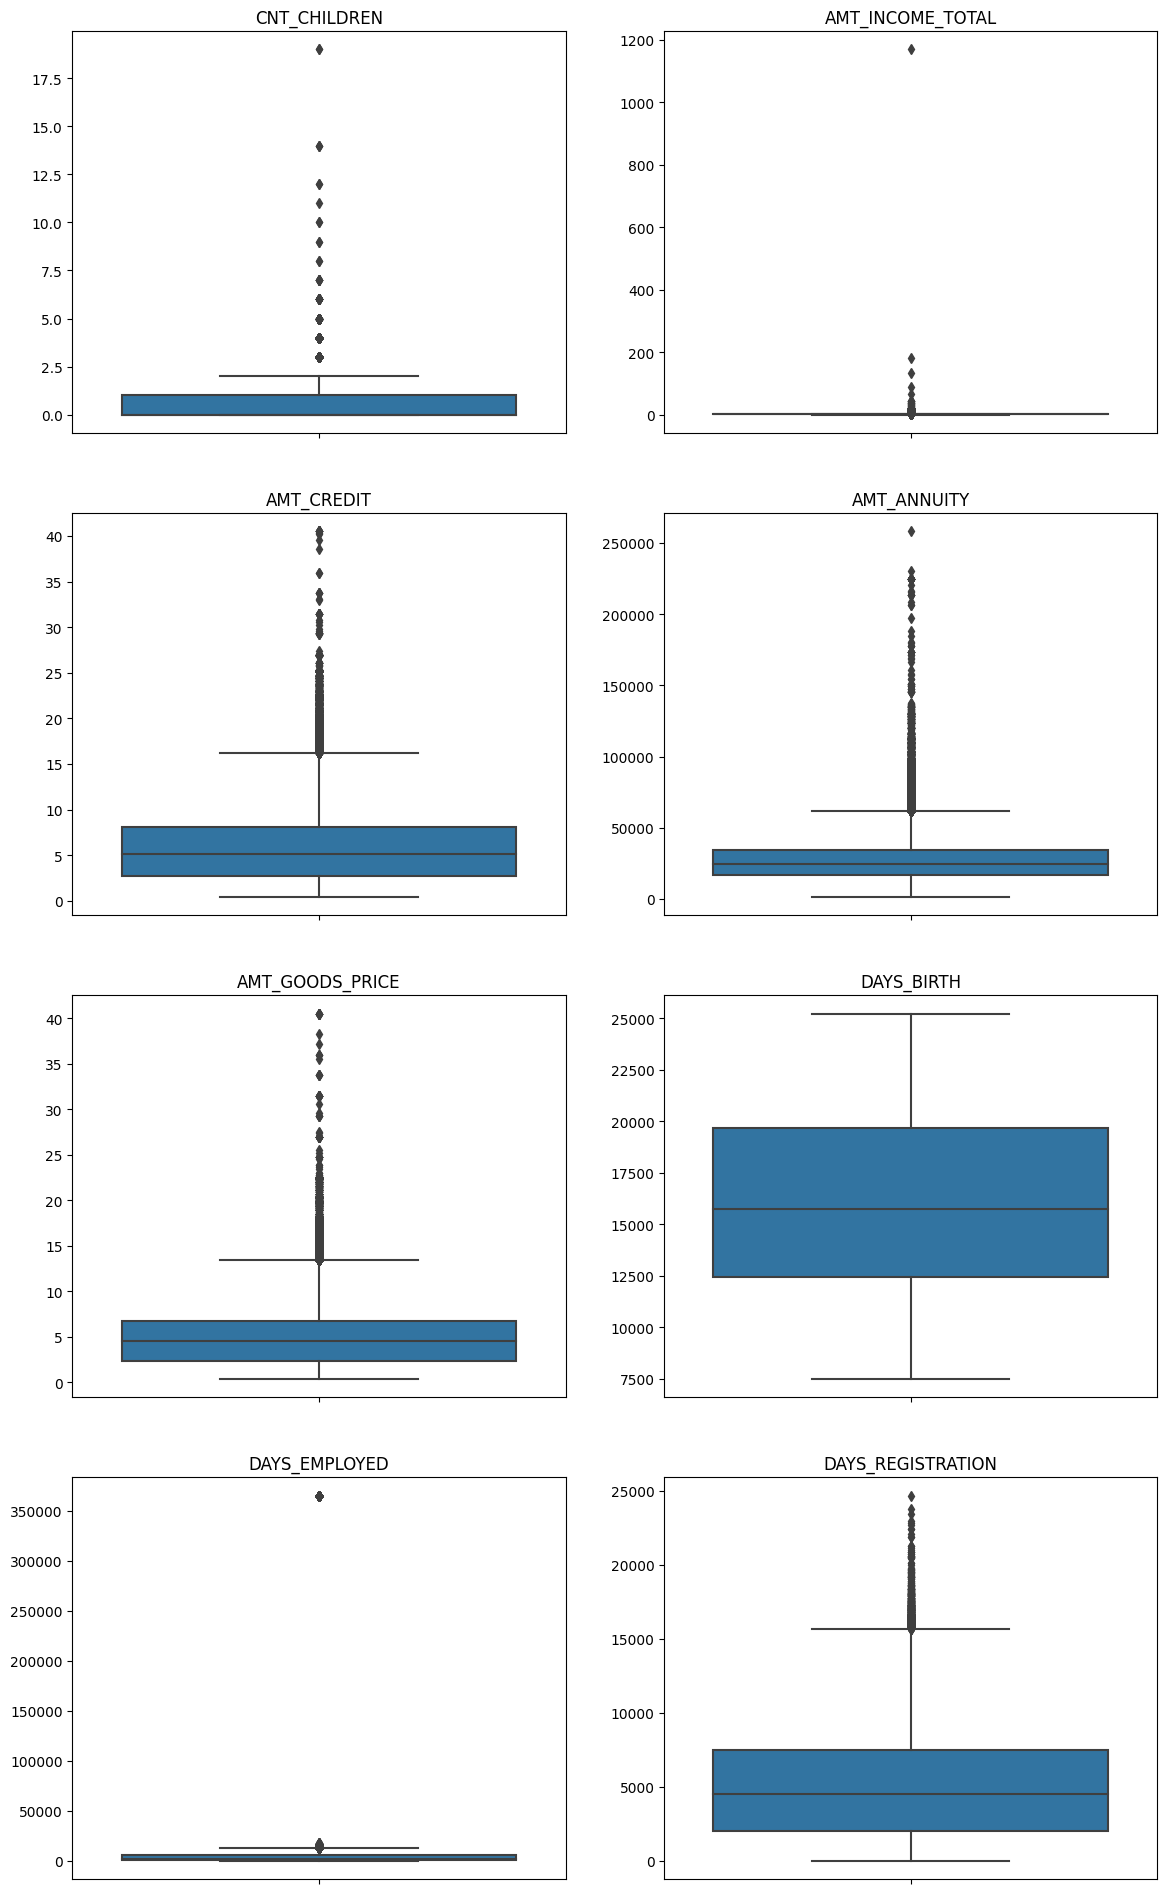

In [331]:
plt.figure(figsize=[14,24])
for i,j in itertools.zip_longest(outlier_cols,range(len(outlier_cols))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y=appl_data[i],orient='h')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(i)

From the graph above, we see that
- AMT_ANUITY, AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN columns have outliers
- AMT_INCOME_TOTAL has the outliers value is far exceed the 75% percentile, indicates that some of the loan applicant have peak income in comparision with the rest
- DAYS_BIRTH appear to have no outlier, so the data is reliable
- DAYS_EMPLOYED has the outliers value of ~350000 days, which is 958 years. It is incorrect, so it needs to be fixed.

In [332]:
appl_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_3                     2
REG_REGION_NOT_WORK_REGION          2
FLAG_MOBIL                          2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EXP_YEARS                           7
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AGE_GROUP                           9
DEF_30_CNT_S

In [333]:
#Checking the number of unique values each column possess to identify categorical columns
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

# 6. Converting desired columns from Object to categorical column

In [334]:
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU

We select the columns that can be categorized, such as:
- the value of the column that can be easily categorized (have few value, such as 2 (male-female), or less than 10)
\n\
If it is too many unique values, it cant be categorized

In [335]:
#select the columns that can be categorized
categ_cols =['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']
for col in categ_cols:
    appl_data[col]=pd.Categorical(appl_data[col])

In [336]:
len(categ_cols) #we have 21 cols that are converted

21

In [337]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

We are now ready to analyse 53 columns in the dataset

# Data set 2: 

In [338]:
# Importing the dataset 'previous_application.csv'
prev_appl=pd.read_csv('previous_application.csv')

In [339]:
prev_appl.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [340]:
# Check the rows and cols number
prev_appl.shape

(1670214, 37)

In [341]:
# check the dataset info
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [342]:
# Check the numeric variables of the dataframe
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115833    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

Takeaways:
- There are 37 cols, 1670214 rows
- Found negative value. Fixing needed

In [343]:
# Checking null values
null_values(prev_appl)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [344]:
# Create a variable to store cols have null values >50%
prev_null_col_50= null_values(prev_appl)[null_values(prev_appl)>50]
prev_null_col_50

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

In [345]:
# Drop these 4 cols 
prev_appl.drop(columns=prev_null_col_50.index,inplace=True)

In [346]:
# Create a variable to store cols have null values > 15%
prev_null_col_15= null_values(prev_appl)[null_values(prev_appl)>15]
prev_null_col_15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [347]:
prev_appl[prev_null_col_15.index]

NAME_TYPE_SUITE  DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT
0                    NaN            365243.0             -37.0          -42.0                      300.0           -42.0                        0.0          17145.0     1730.430         12.0
1          Unaccompanied            365243.0          365243.0       365243.0                      916.0          -134.0                        1.0         607500.0    25188.615         36.0
2        Spouse, partner            365243.0          365243.0       365243.0                       59.0          -271.0                        1.0         112500.0    15060.735         12.0
3                    NaN            365243.0            -177.0         -182.0                     -152.0          -482.0                        1.0         450000.0    47041.335         12.0
4                    NaN                 NaN               NaN            NaN                        NaN             NaN                        NaN         337500.0    31924.395         24.0
...                  ...                 ...               ...            ...                        ...             ...                        ...              ...          ...          ...
1670209              NaN            365243.0            -351.0         -358.0                      362.0          -508.0                        0.0         267295.5    14704.290         30.0
1670210    Unaccompanied            365243.0           -1297.0        -1304.0                    -1274.0         -1604.0                        0.0          87750.0     6622.020         12.0
1670211  Spouse, partner            365243.0           -1181.0        -1187.0                    -1187.0         -1457.0                        0.0         105237.0    11520.855         10.0
1670212           Family            365243.0            -817.0         -825.0                     -825.0         -1155.0                        1.0         180000.0    18821.520         12.0
1670213           Family            365243.0            -423.0         -443.0                      247.0         -1163.0                        0.0         360000.0    16431.300         48.0

[1670214 rows x 10 columns]

**Now we deal with these cols in prev_null_col_15**

In [348]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [349]:
# Now we drop columns that unnecessary during the analysis. These cols may not use when analyzing factors that impact the customer repay the loan
Unnecessary_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

prev_appl.drop(Unnecessary_prev,axis =1, inplace = True)

prev_appl.shape

(1670214, 29)

In [350]:
prev_null_col_15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [351]:
prev_appl.nunique().sort_values() # check if any colums can be categorized, and belongs in prev_null_col_15

NFLAG_INSURED_ON_APPROVAL          2
NAME_PRODUCT_TYPE                  3
NAME_CONTRACT_TYPE                 4
NAME_CONTRACT_STATUS               4
NAME_PAYMENT_TYPE                  4
NAME_CLIENT_TYPE                   4
NAME_YIELD_GROUP                   5
NAME_PORTFOLIO                     5
NAME_TYPE_SUITE                    7
CHANNEL_TYPE                       8
CODE_REJECT_REASON                 9
NAME_SELLER_INDUSTRY              11
PRODUCT_COMBINATION               17
NAME_CASH_LOAN_PURPOSE            25
NAME_GOODS_CATEGORY               28
CNT_PAYMENT                       49
SELLERPLACE_AREA                2097
DAYS_TERMINATION                2830
DAYS_FIRST_DRAWING              2838
DAYS_LAST_DUE                   2873
DAYS_FIRST_DUE                  2892
DAYS_DECISION                   2922
DAYS_LAST_DUE_1ST_VERSION       4605
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
AMT_APPLICATION                93885
SK_ID_CURR                    338857
A

In [352]:
# Imputing values 'Unknown' since NAME_TYPE_SUITE can be categorized
prev_appl['NAME_TYPE_SUITE']=prev_appl['NAME_TYPE_SUITE'].fillna('Unknown')
null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE':
- these columns count days thus will keeping null values, no fill
- Find a way to fix the values (negative, grouping values)

In [353]:
# Analyzing numerical cols
prev_appl[prev_null_col_15.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT
count       997149.000000     997149.000000  997149.000000              997149.000000   997149.000000              997149.000000     1.284699e+06  1.297979e+06  1.297984e+06
mean        342209.855039      81992.343838   76582.403064               33767.774054    13826.269337                   0.332570     2.278473e+05  1.595512e+04  1.605408e+01
std          88916.115833     153303.516729  149647.415123              106857.034789    72444.869708                   0.471134     3.153966e+05  1.478214e+04  1.456729e+01
min          -2922.000000      -2874.000000   -2889.000000               -2801.000000    -2892.000000                   0.000000     0.000000e+00  0.000000e+00  0.000000e+00
25%         365243.000000      -1270.000000   -1314.000000               -1242.000000    -1628.000000                   0.000000     5.084100e+04  6.321780e+03  6.000000e+00
50%         365243.000000       -499.000000    -537.000000                -361.000000     -831.000000                   0.000000     1.123200e+05  1.125000e+04  1.200000e+01
75%         365243.000000        -44.000000     -74.000000                 129.000000     -411.000000                   1.000000     2.340000e+05  2.065842e+04  2.400000e+01
max         365243.000000     365243.000000  365243.000000              365243.000000   365243.000000                   1.000000     6.905160e+06  4.180581e+05  8.400000e+01

In [354]:
columns_with_days = [col for col in prev_appl if 'DAYS' in col] # find all DAYS cols
columns_with_days

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [355]:
# Store all Days cols in 1 var 
prev_day_cols = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
prev_appl[prev_day_cols].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION
count   1.670214e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000
mean   -8.806797e+02       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838
std     7.790997e+02        88916.115833    72444.869708              106857.034789  149647.415123     153303.516729
min    -2.922000e+03        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000
25%    -1.300000e+03       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000
50%    -5.810000e+02       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000
75%    -2.800000e+02       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000
max    -1.000000e+00       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000

In [356]:
# convert negative days into positive using abs
prev_appl[prev_day_cols]= abs(prev_appl[prev_day_cols])
prev_appl[prev_null_col_15.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT
count       997149.000000     997149.000000  997149.000000              997149.000000   997149.000000              997149.000000     1.284699e+06  1.297979e+06  1.297984e+06
mean        342340.056543      83505.775017   78152.730207               35163.363265    15949.224065                   0.332570     2.278473e+05  1.595512e+04  1.605408e+01
std          88413.495220     152484.418802  148833.342466              106405.950190    72007.270877                   0.471134     3.153966e+05  1.478214e+04  1.456729e+01
min              2.000000          2.000000       2.000000                   0.000000        2.000000                   0.000000     0.000000e+00  0.000000e+00  0.000000e+00
25%         365243.000000        447.000000     455.000000                 257.000000      475.000000                   0.000000     5.084100e+04  6.321780e+03  6.000000e+00
50%         365243.000000       1171.000000    1155.000000                 741.000000      921.000000                   0.000000     1.123200e+05  1.125000e+04  1.200000e+01
75%         365243.000000       2501.000000    2418.000000                1735.000000     1825.000000                   1.000000     2.340000e+05  2.065842e+04  2.400000e+01
max         365243.000000     365243.000000  365243.000000              365243.000000   365243.000000                   1.000000     6.905160e+06  4.180581e+05  8.400000e+01

In [357]:
# convert days to years
bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
prev_appl['YEARLY_DECISION'] = pd.cut(prev_appl['DAYS_DECISION'],bins,labels=slots)
prev_appl['YEARLY_DECISION'].value_counts(normalize=True)*100

YEARLY_DECISION
1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: proportion, dtype: float64

Takeaways:
- Approx 35% loan applicants have applied for a new loan within 1 year of previous loan decision

In [358]:
prev_appl.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [359]:
null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
SK_ID_PREV                    0.00
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

# We will deal with the variable 'AMT_ANNUITY', 'AMT_GOODS_PRICE' 
These values are continous variables, so we have to plot the distribution of the columns and used:
- median if the distribution is skewed
- mode if the distribution pattern is preserved

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

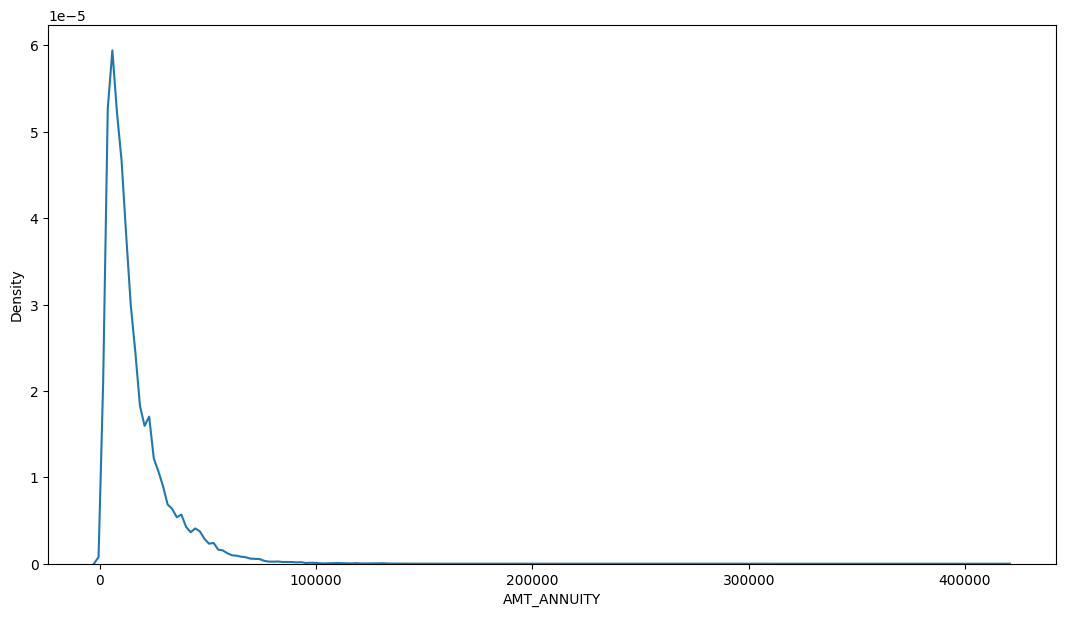

In [360]:
# plotting a kdeplot to understand distribution of 'AMT_ANUITY'
plt.figure(figsize=[13,7])
sns.kdeplot(prev_appl['AMT_ANNUITY'])

As we can see, there is only a single peak at the left side of the distribution, it indicates that the presence of outliers, so imputing the data with mean is not a appropriate approach. We choose imputing with median in this case.

In [361]:
# imputing missing values with median
prev_appl['AMT_ANNUITY'].fillna(prev_appl['AMT_ANNUITY'].median(),inplace=True)

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

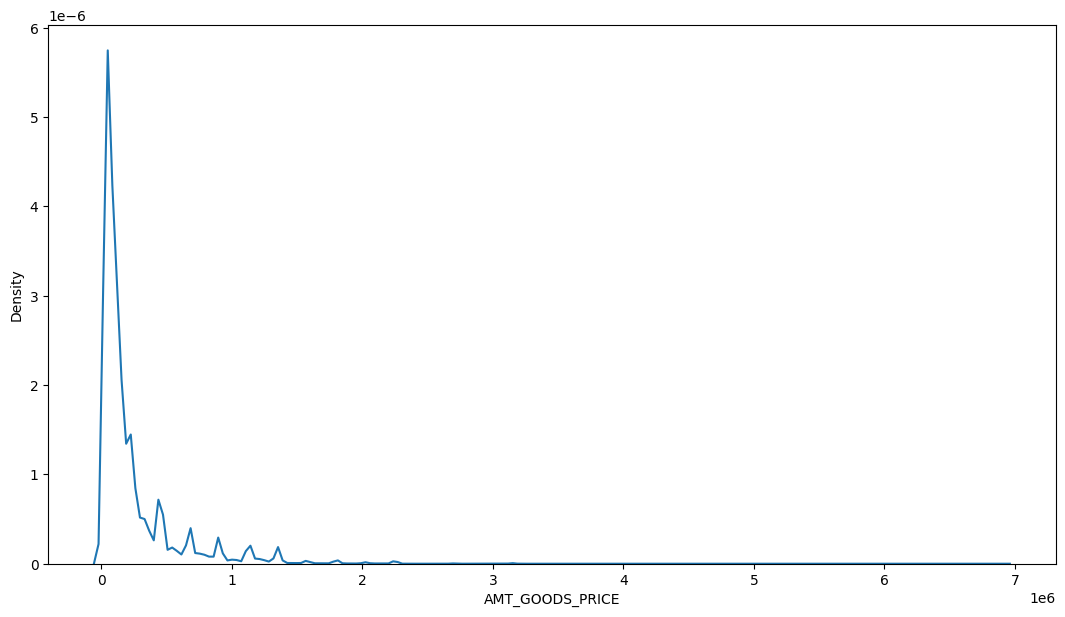

In [362]:
# plotting kdeplot for 'AMT_GOODS_PRICE' for better understanding the data
plt.figure(figsize=[13,7])
sns.kdeplot(prev_appl['AMT_GOODS_PRICE'])

As we can see, there are several peaks along the distribution. We will try to impute with mode,median and mean and see if the distribution is still the same

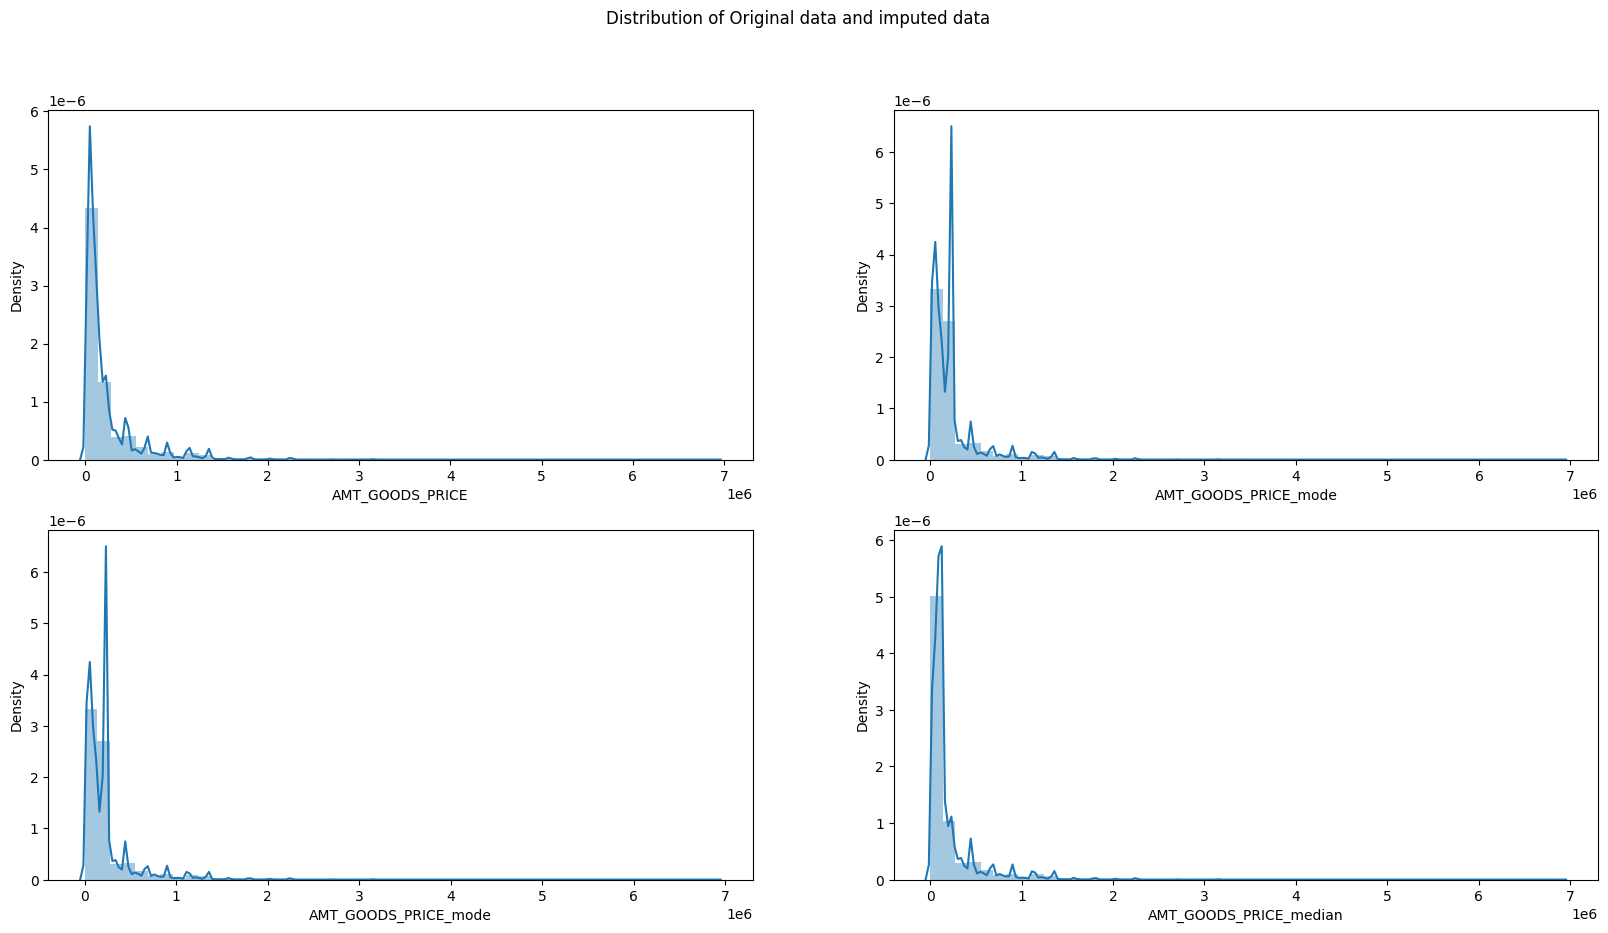

In [363]:
# Create a new dataframe for 'AMT_GOODS_PRICE' with columns imputed with mode,median and mean
gdprice_df= pd.DataFrame()
gdprice_df['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0])
gdprice_df['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mean())
gdprice_df['AMT_GOODS_PRICE_median'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median())
cols = ['AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_median']
plt.figure(figsize=[20,10])
plt.suptitle('Distribution of Original data and imputed data')
plt.subplot(221)
sns.distplot(prev_appl['AMT_GOODS_PRICE'][pd.notnull(prev_appl['AMT_GOODS_PRICE'])])
for i in enumerate(cols):
             plt.subplot(2,2,i[0]+2)
             sns.distplot(gdprice_df[i[1]])


Let's break down the provided code line by line:

gdprice_df = pd.DataFrame(): This line creates an empty DataFrame called gdprice_df using pandas. It initializes an empty container to store the results of data imputation.

gdprice_df['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0]): In this line:

It creates a new column in gdprice_df called 'AMT_GOODS_PRICE_mode'.
It fills the missing values in the 'AMT_GOODS_PRICE' column from the prev_appl DataFrame with the mode of that column (the most frequent value).
The result is that 'AMT_GOODS_PRICE_mode' in gdprice_df contains the original 'AMT_GOODS_PRICE' values where they exist and the mode value where they are missing.
gdprice_df['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mean()): This line is similar to the previous one, but it fills missing values with the mean of the 'AMT_GOODS_PRICE' column instead of the mode. It overwrites the 'AMT_GOODS_PRICE_mode' column with mean-imputed values.

gdprice_df['AMT_GOODS_PRICE_median'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median()): This line creates a new column 'AMT_GOODS_PRICE_median' in gdprice_df and fills missing values in 'AMT_GOODS_PRICE' with the median of the column. It overwrites the 'AMT_GOODS_PRICE_median' column with median-imputed values.

cols = ['AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_median']: This line creates a list cols containing the names of the three columns you want to visualize in the following plots: 'AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_mode' (repeated), and 'AMT_GOODS_PRICE_median'. Note that 'AMT_GOODS_PRICE_mode' is repeated twice in the list, which seems to be a mistake.

plt.figure(figsize=[20,10]): This line creates a new Matplotlib figure with a specified size of 20 inches in width and 10 inches in height. The figure serves as the canvas for your subplots.

plt.suptitle('Distribution of Original data and imputed data'): This sets a super title (a title for the entire figure) for your plots, indicating that you are comparing the distribution of original data and imputed data.

plt.subplot(221): This specifies the first subplot in a 2x2 grid. It is the top-left subplot, which is where the distribution of the original 'AMT_GOODS_PRICE' data is plotted.

sns.distplot(prev_appl['AMT_GOODS_PRICE'][pd.notnull(prev_appl['AMT_GOODS_PRICE'])]): This line uses Seaborn's distplot() function to create a distribution plot (histogram) for the original 'AMT_GOODS_PRICE' data. It filters out missing values using pd.notnull before plotting.

for i in enumerate(cols):: This line initiates a loop to create distribution plots for the imputed data. The enumerate() function is used to iterate through the cols list, providing both the index and the column name at each iteration.

plt.subplot(2,2,i[0]+2): Inside the loop, this line specifies the position of the current subplot in a 2x2 grid, starting from the top-right and moving to the bottom-right and then bottom-left.

sns.distplot(gdprice_df[i[1]]): This line uses Seaborn's distplot() to create distribution plots for the imputed data in columns specified by i[1]. It visualizes the distribution of imputed 'AMT_GOODS_PRICE' data for each imputation method in separate subplots.

**The original dist is closer with the dist of data imputed with mode in this scenario, so we choose mode to impute data**

In [364]:
# Impute null values with mode
prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0],inplace=True)

# Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicates that these loans were not started

In [365]:
# taking out values count for NAME_CONTRACT_STATUS categs where CNT_PAYMENT is null
prev_appl.loc[prev_appl['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

**In Columns dictionary**:
- CNT_PAYMENT: Term of previous credit at application of the previous application (Term loan)
- NAME_CONTRACT_STATUS: Contract status (approved, cancelled, ...) of previous application
\n\

**Code explain**:
\n\
prev_appl['CNT_PAYMENT'].isnull(): This part of the code first selects the 'CNT_PAYMENT' column from the DataFrame prev_appl using prev_appl['CNT_PAYMENT']. Then, .isnull() is used to create a boolean mask where each element in the 'CNT_PAYMENT' column is True if it is a missing (NaN) value and False otherwise. So, it creates a mask that marks rows where 'CNT_PAYMENT' is missing.

prev_appl.loc[...]: The .loc[] indexer is used to filter rows based on a condition. In this case, it filters rows where the condition prev_appl['CNT_PAYMENT'].isnull() is True. So, it selects only the rows where 'CNT_PAYMENT' is missing.

prev_appl.loc[prev_appl['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS']: This part of the code further selects the 'NAME_CONTRACT_STATUS' column from the filtered rows obtained in step 2. It selects the 'NAME_CONTRACT_STATUS' values from the rows where 'CNT_PAYMENT' is missing.

.value_counts(): Finally, the .value_counts() function is applied to the 'NAME_CONTRACT_STATUS' values obtained in step 3. This function counts the unique occurrences of each value in the 'NAME_CONTRACT_STATUS' column for the filtered rows (where 'CNT_PAYMENT' is missing). It returns a pandas Series with the count of each unique value in descending order.

So, the entire line of code is essentially counting and reporting the number of occurrences of each unique 'NAME_CONTRACT_STATUS' value for the rows where 'CNT_PAYMENT' is missing in the prev_appl DataFrame. This can be useful for analyzing the distribution of contract statuses when payment counts are missing in the dataset.

In [366]:
# imputing value null as 0
prev_appl['CNT_PAYMENT'].fillna(0,inplace=True)

In [367]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'], dtype='object')

In [368]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  object  
 3   AMT_ANNUITY                1670214 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object  
 8   NAME_CONTRACT_STATUS       1670214 non-null  object  
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  object  
 11  CODE_REJECT_REASON         1670214 non-null  object  
 12  NAME_TYPE_SUITE            1670214 non-null  object  
 1

In [369]:
prev_appl.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [370]:
# Converting required categorical cols from Object to Categorical
prev_categ_cols =['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in prev_categ_cols:
    prev_appl[col] =pd.Categorical(prev_appl[col])

# 7 Find Outliers

In [371]:
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02  1.247621e+01       342340.056543    15949.224065               35163.363265   78152.730207      83505.775017                   0.332570
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03  1.447588e+01        88413.495220    72007.270877              106405.950190  148833.342466     152484.418802                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00            2.000000        2.000000                   0.000000       2.000000          2.000000                   0.000000
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00  0.000000e+00       365243.000000      475.000000                 257.000000     455.000000        447.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00  1.000000e+01       365243.000000      921.000000                 741.000000    1155.000000       1171.000000                   0.000000
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01  1.600000e+01       365243.000000     1825.000000                1735.000000    2418.000000       2501.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

From the table, we can see that some cols have the difference between 75% and max value are huge, and those cols have the max values so high are listed below:

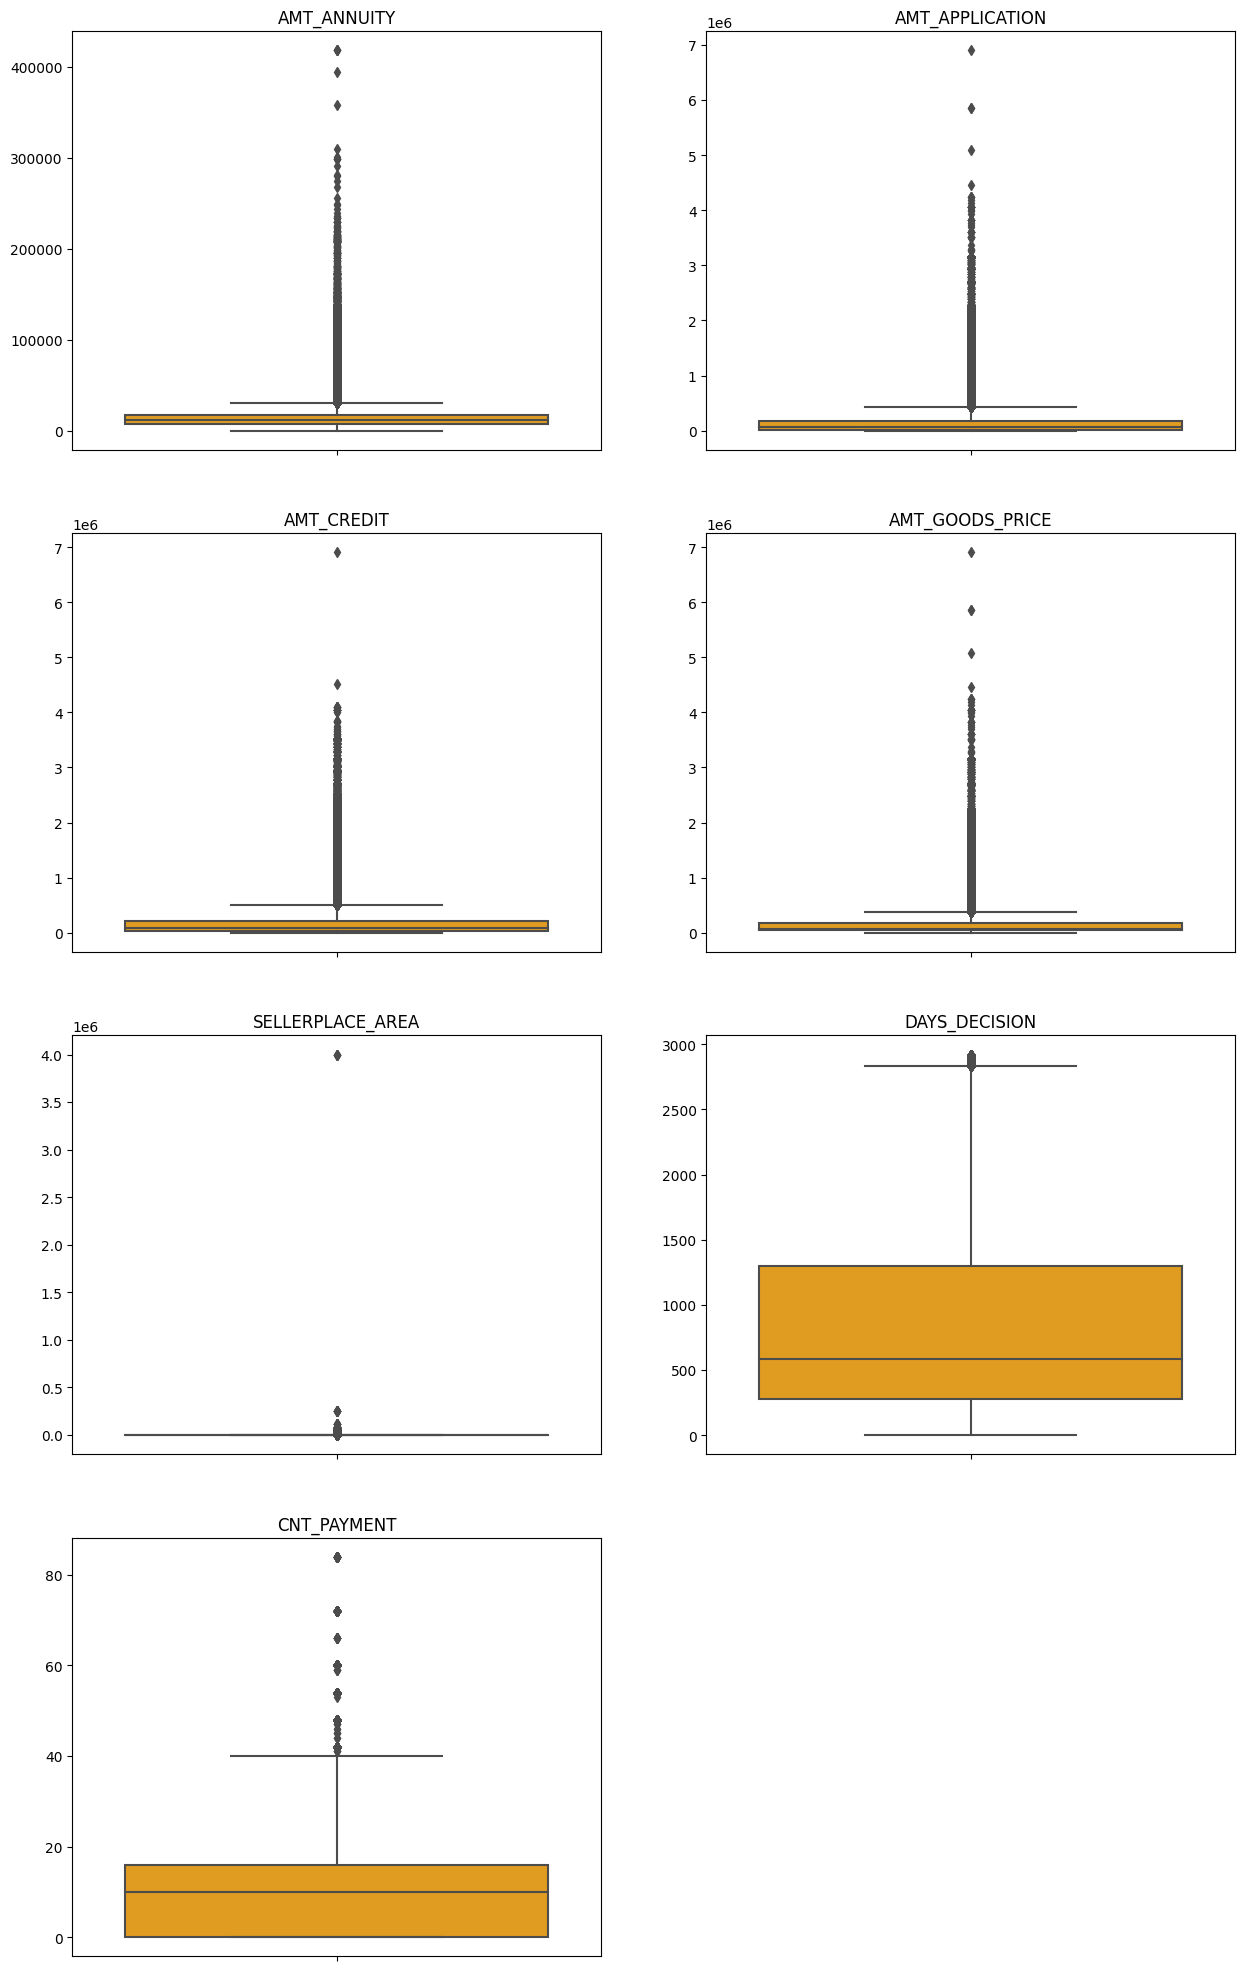

In [372]:
prev_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(prev_outlier_col, range(len(prev_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = prev_appl[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight**
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
- CNT_PAYMENT has a few outlier values.
- DAYS_DECISION has a small number of outliers indicating that these previous applications decisions were taken long back.

# 6. Analyzing data

We analyze data with the following steps:
1. Imbalance data
2. Categorical data analysis
3. Categorical segmented Univariate Analysis
4. Categorical Bi/Multivariate analysis
5. Numeric data analysis
6. Bi-furcation of databased on TARGET data
7. Correlation matrix
8. Numerical segmented Univariate Analysis
9. Numerical Bi/Multivariate analysis

## 6.1. Imbalance Data

Text(0.5, 1.0, 'Imbalance Plotting- Repayer vs Defaulter')

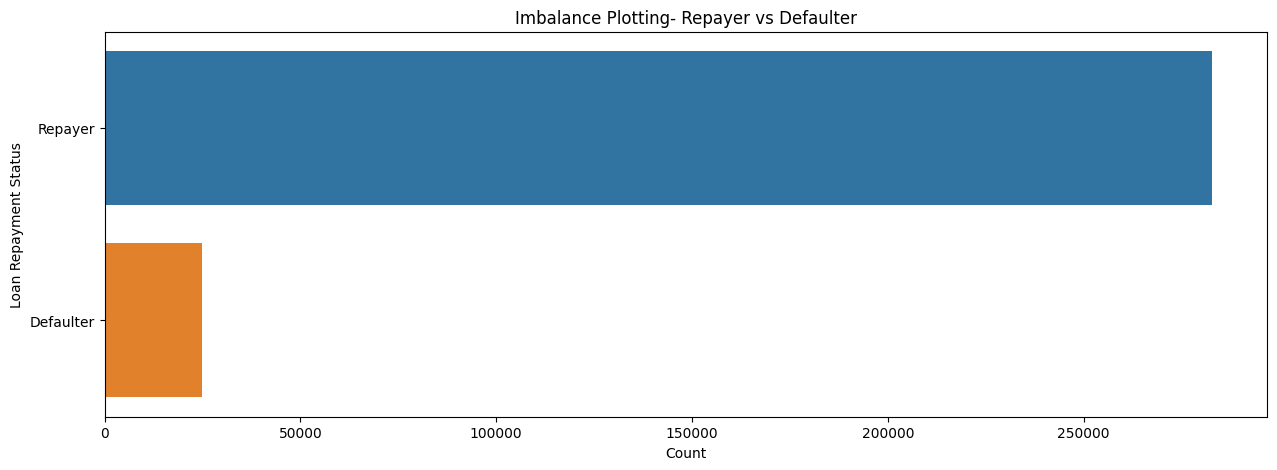

In [373]:
plt.figure(figsize= [15,5])
sns.barplot(y=['Repayer','Defaulter'],x=appl_data['TARGET'].value_counts(),orient='h')
plt.ylabel('Loan Repayment Status')
plt.xlabel('Count')
plt.title('Imbalance Plotting- Repayer vs Defaulter')

In [374]:
# Recheck the TARGET col again, 0 is repayer
appl_data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [375]:
# Ratio between defaulter and repayer
repayer = round((appl_data['TARGET'].value_counts()[0]/len(appl_data)*100),2)
print('Percentage of Repayer equal to {} %'.format(repayer))
defaulter = round((appl_data['TARGET'].value_counts()[1]/len(appl_data)*100),2)
print('Percentage of Defaulter equal to {} %'.format(defaulter))
print("Imbalance Ratio with respect to Repayer and Defaulter is: {0:.2f}/1 (approx)".format(repayer/defaulter))

Percentage of Repayer equal to 91.93 %
Percentage of Defaulter equal to 8.07 %
Imbalance Ratio with respect to Repayer and Defaulter is: 11.39/1 (approx)


**Code explain:**

{0:.2f} is a placeholder within the string. The curly braces {} indicate where a value should be inserted, and 0 inside the curly braces is used to specify which value should be inserted. It refers to the first argument provided to the .format() method.

:.2f inside the placeholder is a format specifier. It indicates how the value should be formatted when inserted into the string:

: separates the placeholder from the format specification.
.2f specifies that the value should be formatted as a floating-point number with two decimal places.
repayer/defaluter is an expression that calculates the ratio of repayer to defaluter. Presumably, repayer and defaluter are variables representing counts or proportions of different groups.

.format(repayer/defaluter) is used to replace the placeholder {0:.2f} in the string with the result of the expression repayer/defaluter, formatted as a floating-point number with two decimal places.

## 6.2. Plotting Functions
**Important Function for Univariate analysis**

We will create a function for plotting variables to do univariate analysis.
This function will create 2 plots:
1. Count plot of given cols with refer to TARGET col
2. % of defaulters within that col.

***The fnc is taking 6 arguments:***
1. dataset: to put the dataset we want to use
2. col: cols name for which we need to do the analysis
3. target_col: col for which we use to comparing
4. ylog: y-axis in log10 term, in case the plot is unreadable
5. x_label_angle: to maintain the orientation of x-axis label
6. h_layout: horizontal layout of the subplot

In [376]:
# Function 1: Create a func to find if the col is categorical or numerical
def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return 'numerical'
    if dataset[col].dtype == 'category':
        return 'categorical'
    
# Function 2: Create a func 'univariate' to perform analysis one single var with ref to target
def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col)== 'numerical':
        sns.distplot(dataset[col],hist=False)
        
    elif data_type(dataset,col) == 'categorical':
        val_count = dataset[col].value_counts()
        df1= pd.DataFrame({col:val_count.index,'count':val_count.values})
        
        target_1_percentage = dataset[[col,target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace=True)
        
# Function 3: If the plot is unreadable, we use log scale
        h_layout = True  # Define h_layout as True or False based on your desired layout
        if(h_layout):
            fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=[16,8])
        else:
            fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=[35,45])
    
# 1. Subplot 1: Count plot of the col
        s= sns.countplot(ax=ax1,x=col,data=dataset,hue=target_col)
        ax1.set_title(col,fontsize=25)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize':15,"fontweight":4})
        if (x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
    
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})


**Function explaination**:
***Function 1:***
- The data_type function appears to determine the type of data (numerical or categorical) based on the data type of a specified column in the dataset.
- This function takes two arguments: dataset (the DataFrame) and col (the column for which you want to determine the data type).
- It checks the data type of the specified column using dataset[col].dtype. If the data type is either np.int64 (64-bit integer) or np.float64 (64-bit floating-point), it returns 'numerical'. If the data type is 'category', it returns 'categorical'.

***Function 2:***
- This paragraph starts defining the univariate function and includes configurations for creating subplots.
- The univariate function takes several arguments, including dataset (the DataFrame), col (the column you want to analyze), target_col (the column related to the target variable), and optional parameters for plot customization.
- Inside the function, it checks whether the specified column is numerical or categorical using the data_type function. If it's numerical, it creates a distribution plot using sns.distplot. If it's categorical, there are additional plot configurations to be defined (these are indicated but not provided in the code snippet).

***Function 3:***
- In this paragraph, you define the h_layout variable to control whether the subplots should be arranged horizontally (True) or vertically (False).

- You use an if statement to create subplots based on the value of h_layout. If it's True, two subplots will be created side by side (ncols=2), and if it's False, two subplots will be created one above the other (nrows=2).

***Subplot function:***
- This paragraph is responsible for creating and configuring two subplots:

- Subplot 1 (ax1): It's a count plot (sns.countplot) showing the count of values in the specified col with different colors based on the target_col. Various plot properties like title, legend, and label are customized.
- Subplot 2 (ax2): It's a bar plot (sns.barplot) showing the percentage of defaulters within the specified col. Again, various plot properties are customized.
There are conditional checks (if (x_label_angle)) to rotate x-axis labels based on the x_label_angle parameter, and there's also an option to use a logarithmic scale for the y-axis if ylog is True.

In [377]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [378]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

Here's what each part of the function does:

def bivariate_c(x, y, df, hue, figsize, labels):: This line defines the bivariate_c function with six parameters:

x: The x-axis data (categorical).
y: The y-axis data (usually counts or percentages).
df: The DataFrame containing the data.
hue: The categorical variable used to create subgroups in the barplot.
figsize: The size of the resulting figure (width and height).
labels: A list of labels used in the legend to represent different categories or groups.
plt.figure(figsize=figsize): This line creates a new figure (plotting area) with a specified size, as defined by the figsize parameter. The figsize parameter is a tuple that specifies the width and height of the figure.

sns.barplot(x=x, y=y, data=df, hue=hue): This line generates a barplot using Seaborn's barplot function. It plots the data based on the x and y variables, with the data coming from the DataFrame df. The hue parameter is used to create subgroups or color distinctions within the bars, typically based on another categorical variable.

The following lines set various aesthetics for the plot, such as:

plt.xlabel(x, fontsize=15): Sets the x-axis label with a specified font size.
plt.ylabel(y, fontsize=15): Sets the y-axis label with a specified font size.
plt.title(col, fontsize=20): Sets the title of the plot (note that col is not defined in this function, which might be a typo or oversight).
plt.xticks(rotation=45, ha='right'): Rotates the x-axis labels by 45 degrees for readability and aligns them to the right.
plt.legend(labels=labels): Adds a legend to the plot, labeling different categories or groups using the labels parameter.
Finally, plt.show() is called to display the plot.

Overall, this function is designed to create barplots for bivariate categorical analysis, making it easy to visualize relationships between two categorical variables, while allowing customization of aesthetics and labels. However, please note the potential issue with the undefined col variable in the plt.title() line, which should likely be replaced with y or another appropriate label.

In [379]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

col: This parameter represents the categorical variable (column) for which you want to create the count plot. It's the variable along the x-axis of the count plot.

df: This parameter is the DataFrame containing the data to be visualized.

hue: This parameter allows you to add an additional categorical variable to differentiate data within the col variable. It determines the color of bars within the count plot based on different categories within hue.

palette: You can specify a color palette to control the colors of the bars in the count plot. It should be a list of color names or a dictionary of colors.

ylog: This is a boolean parameter. If set to True, the y-axis of the count plot will use a logarithmic scale. This can be helpful when dealing with highly skewed data to better visualize the distribution.

figsize: This parameter sets the size of the figure (plot) in inches. It should be a tuple of two values, specifying the width and height of the figure.

Inside the function:

plt.figure(figsize=figsize): This line creates a new figure (plotting area) with the specified size.

ax = sns.countplot(x=col, data=df, hue=hue, palette=palette, order=df[col].value_counts().index): This line creates the count plot using Seaborn's countplot function. It specifies the data (df), the categorical variable (col) along the x-axis, the hue variable for color differentiation, the color palette, and the order of categories based on their counts (descending order).

if ylog:: This conditional statement checks if the ylog parameter is set to True.

If ylog is True, it sets the y-axis scale to logarithmic using plt.yscale('log').
plt.ylabel(...): This line sets the y-axis label based on whether the y-axis is logarithmic or not.

plt.title(...): It sets the title of the count plot using the col parameter.

plt.legend(...): This adds a legend to the plot based on the hue variable.

plt.xticks(...): This adjusts the x-axis labels, rotating them for better readability.

plt.show(): Finally, this command displays the count plot.

In summary, this function helps you create count plots for a categorical variable, allowing you to specify various plot settings such as color palette, logarithmic y-axis, and figure size. The count plot visualizes the distribution of categories within the chosen variable.

In [380]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [381]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(appl_data.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(appl_data.select_dtypes(["int","float"]).columns)  #N Numerical Column list

## 6.3. Categorical Variable Analysis
### 6.3.1. Segmented Univariate Analysis

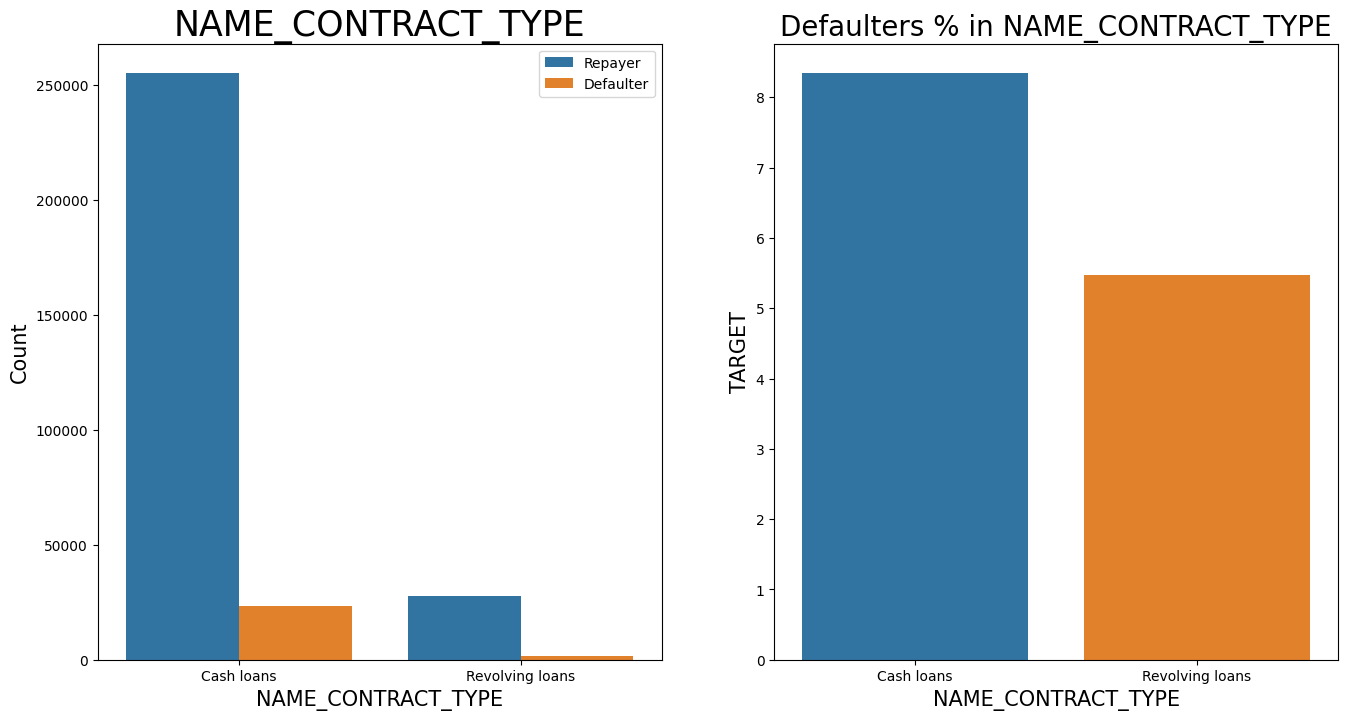

In [382]:
#1 Checking the contract type based on loan repayment status
univariate(appl_data,'NAME_CONTRACT_TYPE',"TARGET",False,False,True)

univariate: This is the name of the function that've defined in this code. It's used to perform univariate analysis on a specified column.

appl_data: This is the DataFrame you want to analyze. It's assumed that appl_data contains your dataset.

'NAME_CONTRACT_TYPE': This is the name of the column you want to analyze. In this case, you're interested in the 'NAME_CONTRACT_TYPE' column, which likely contains information about the type of contracts.

"TARGET": This is the name of the target column. It's the column against which you want to analyze 'NAME_CONTRACT_TYPE'. The analysis may involve comparing 'NAME_CONTRACT_TYPE' values with the values in the 'TARGET' column to see how they relate to each other.

False: This argument is used for the ylog parameter, which controls whether to use a logarithmic scale on the y-axis in the plots. In this case, you've set it to False, indicating that you don't want to use a logarithmic scale.

False: This argument is used for the x_label_angle parameter, which controls whether to rotate the x-axis labels in the plots. Again, you've set it to False, indicating that you don't want to rotate the labels.

True: This argument is used for the h_layout parameter, which determines the layout of subplots. Here, you've set it to True, indicating that you want to create subplots with a horizontal layout.

Overall, the code is invoking the univariate function to analyze the 'NAME_CONTRACT_TYPE' column in the appl_data DataFrame with respect to the 'TARGET' column. It will generate plots and visualizations based on the specified parameters and display them accordingly, given the settings you've provided in the function call. The analysis will help you understand how the contract types ('NAME_CONTRACT_TYPE') relate to the target variable ('TARGET').

**Insight**:
- 10% of the total number of loans are revolving loans (small number)
- Approx 8% of cash loans applicant and 5-6% revolving loans are from defaulters.

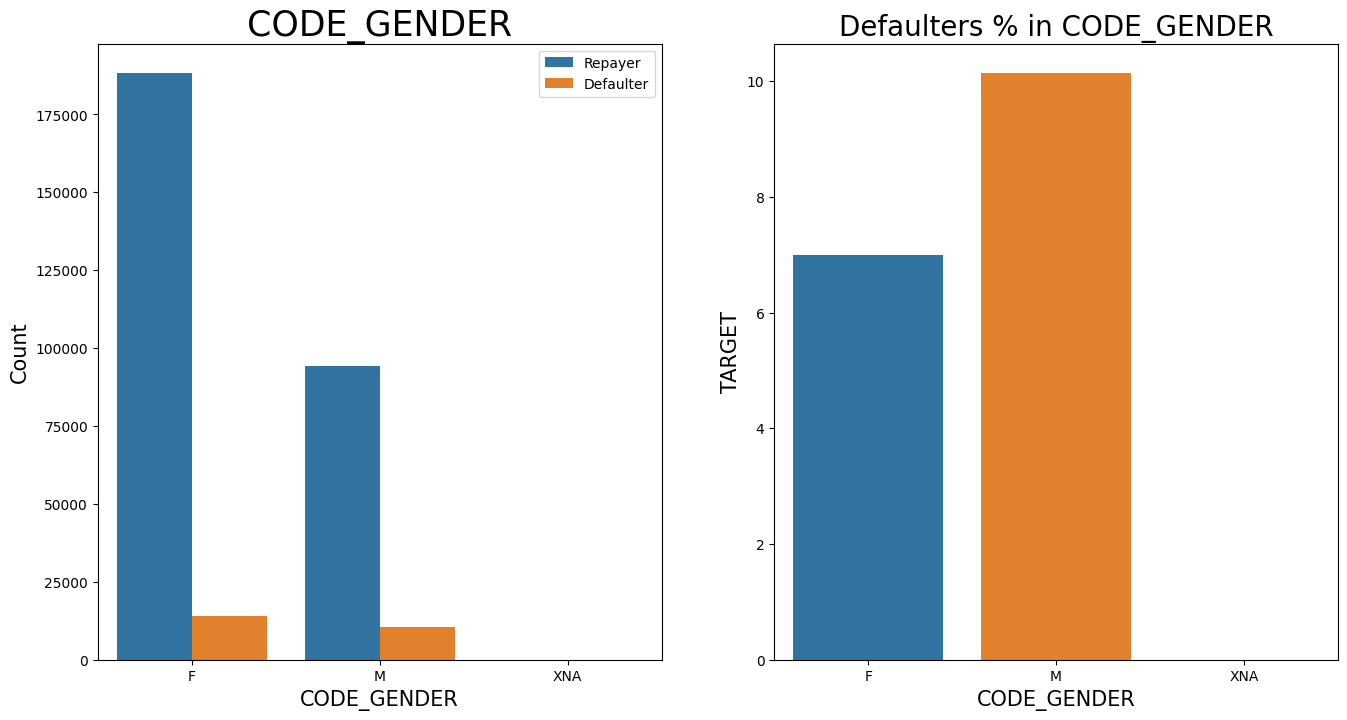

In [383]:
#2 Check gender type on loan repayment status
univariate(appl_data,'CODE_GENDER','TARGET',False,False,True)

**Insight:**
- The number of female applicants is approx double the number of male applicants
- Male have a higher percentage of defaulter (around 10%), than female (around 7%)

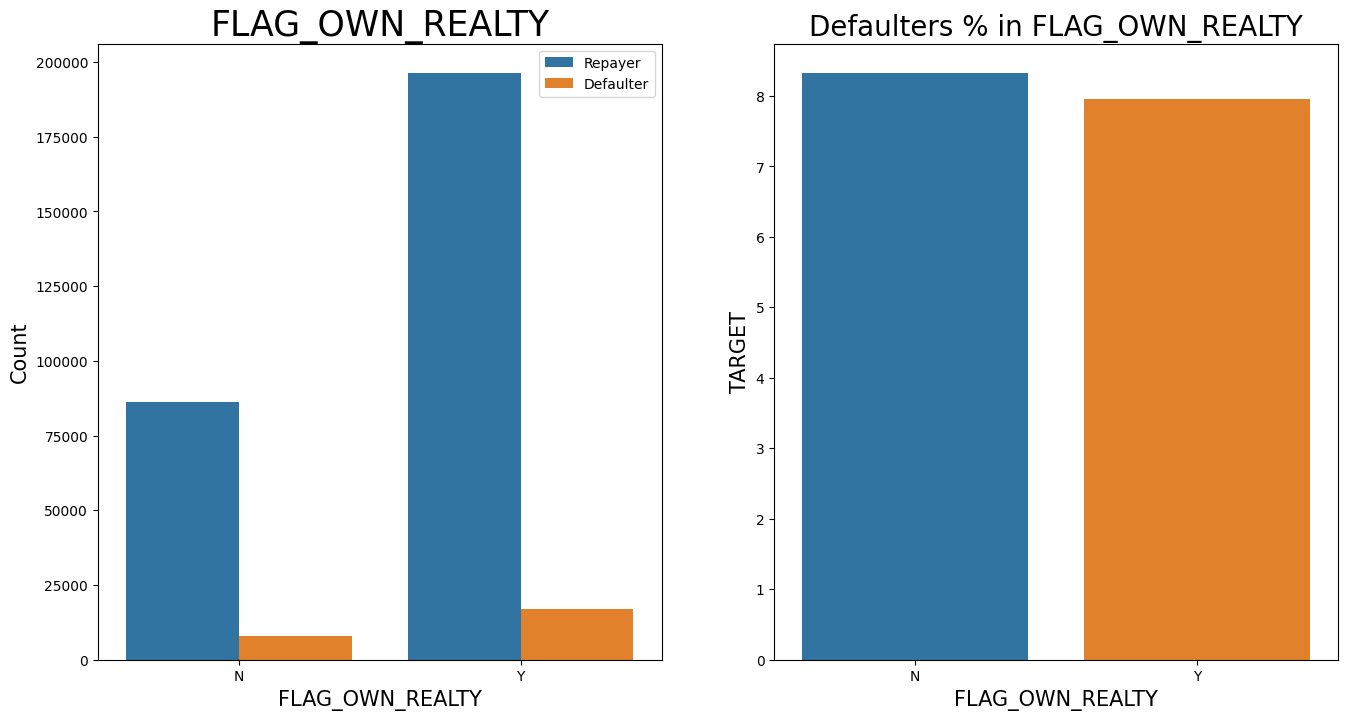

In [384]:
#3 Check if owning real estate is related to  loan repayment status
univariate(appl_data,'FLAG_OWN_REALTY','TARGET',False,False,True)

**Insight:**
- The number of applicant who have real estate is almost double the applicant who doesnt.
- The default rate of both category are the same (around 8%). This indicate that there is no correlation between owning a real estate and defaulting the loan

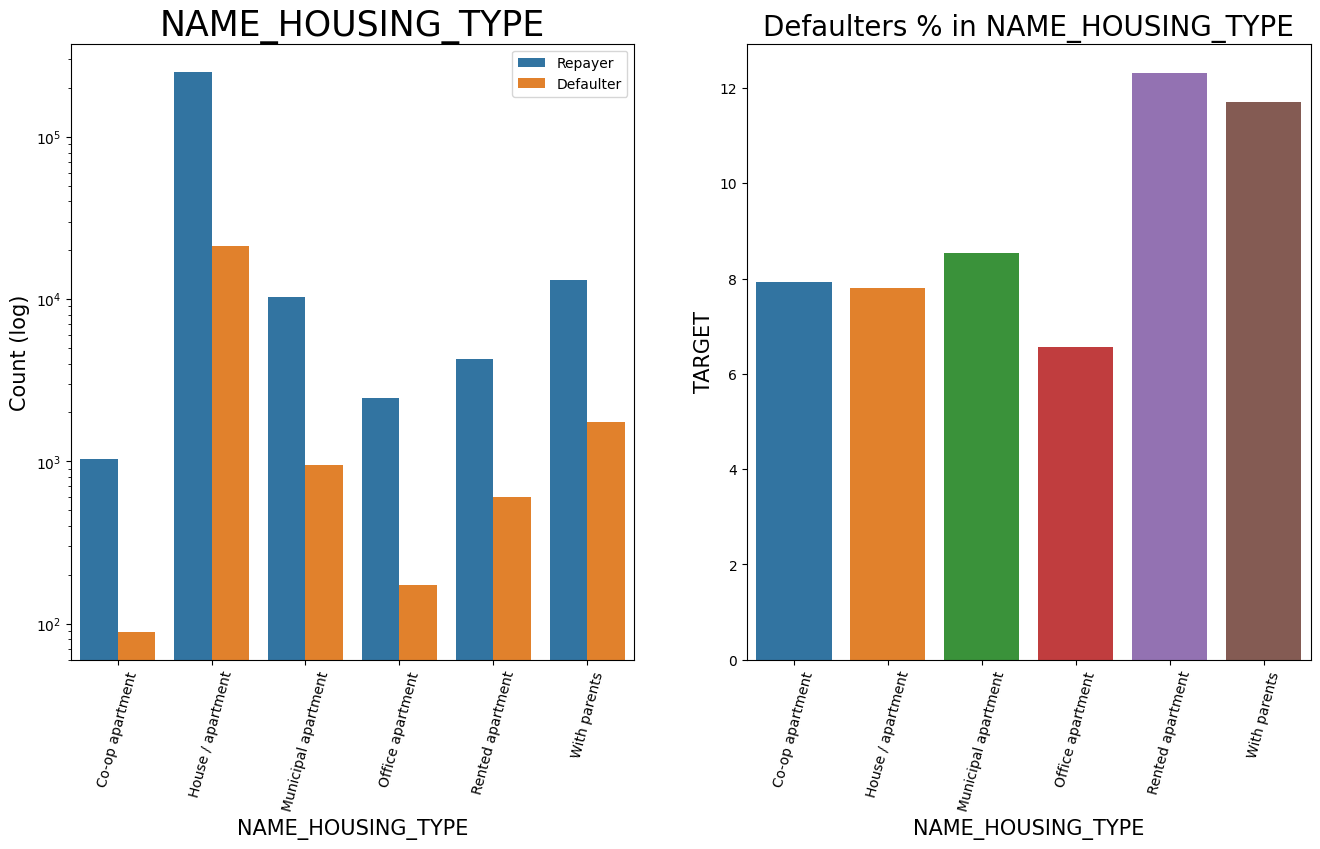

In [385]:
#4 Analyzing Housing Type based on loan repayment status
univariate(appl_data,'NAME_HOUSING_TYPE','TARGET',True,True,True)

**Insight**:
- A large number of applicant lives in House/apartment
- Applicant lives in office apartment has the lowest default rate
- Applicant who lives with parents or in a rent apartment have a higher chance of defaulting loans.

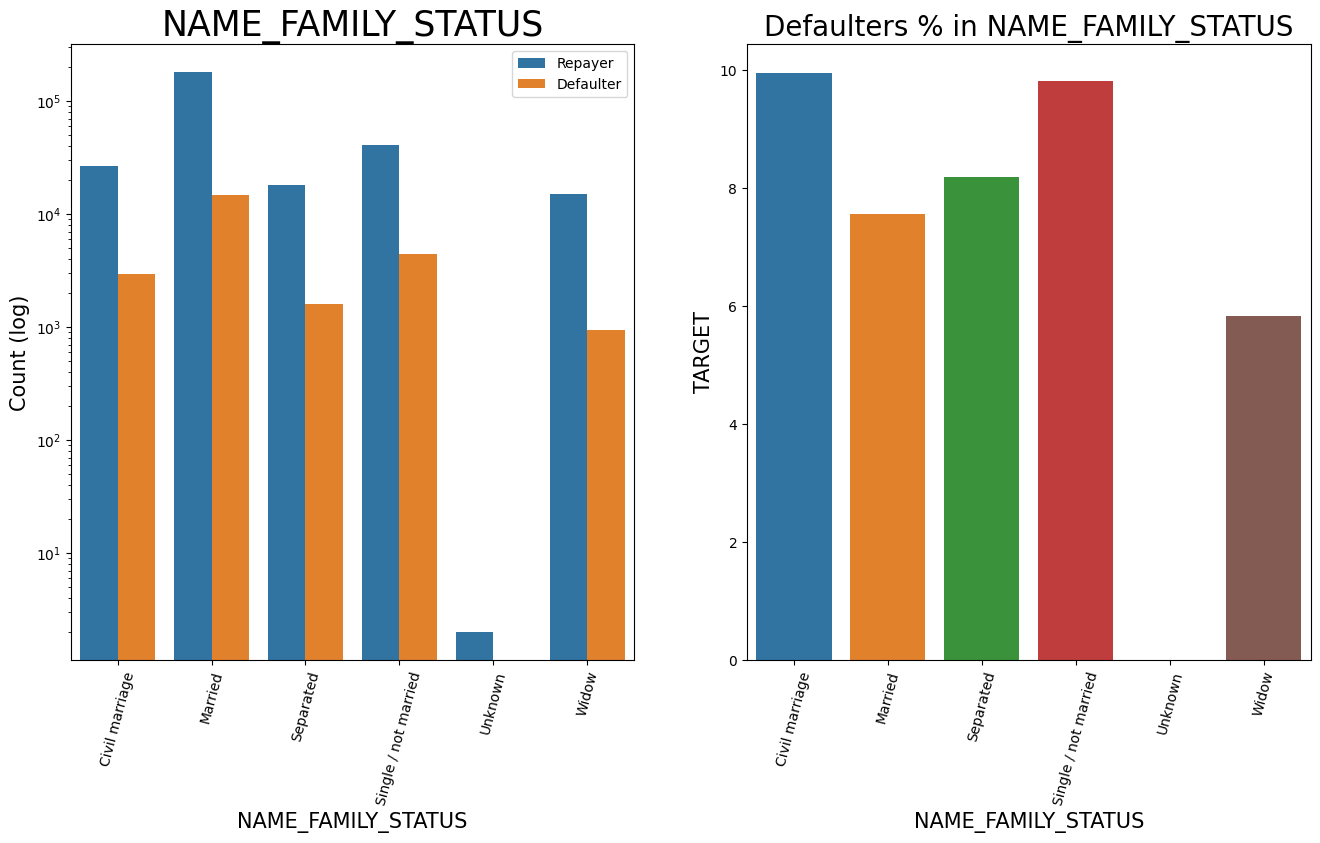

In [386]:
#5 Analyzing family status based on loan repayment status
univariate(appl_data,'NAME_FAMILY_STATUS','TARGET',True,True,True)

**Insight:**
- Married applicant took the highest proportion of loans applicant
- Civil marriage has the highest proportion of defaulter

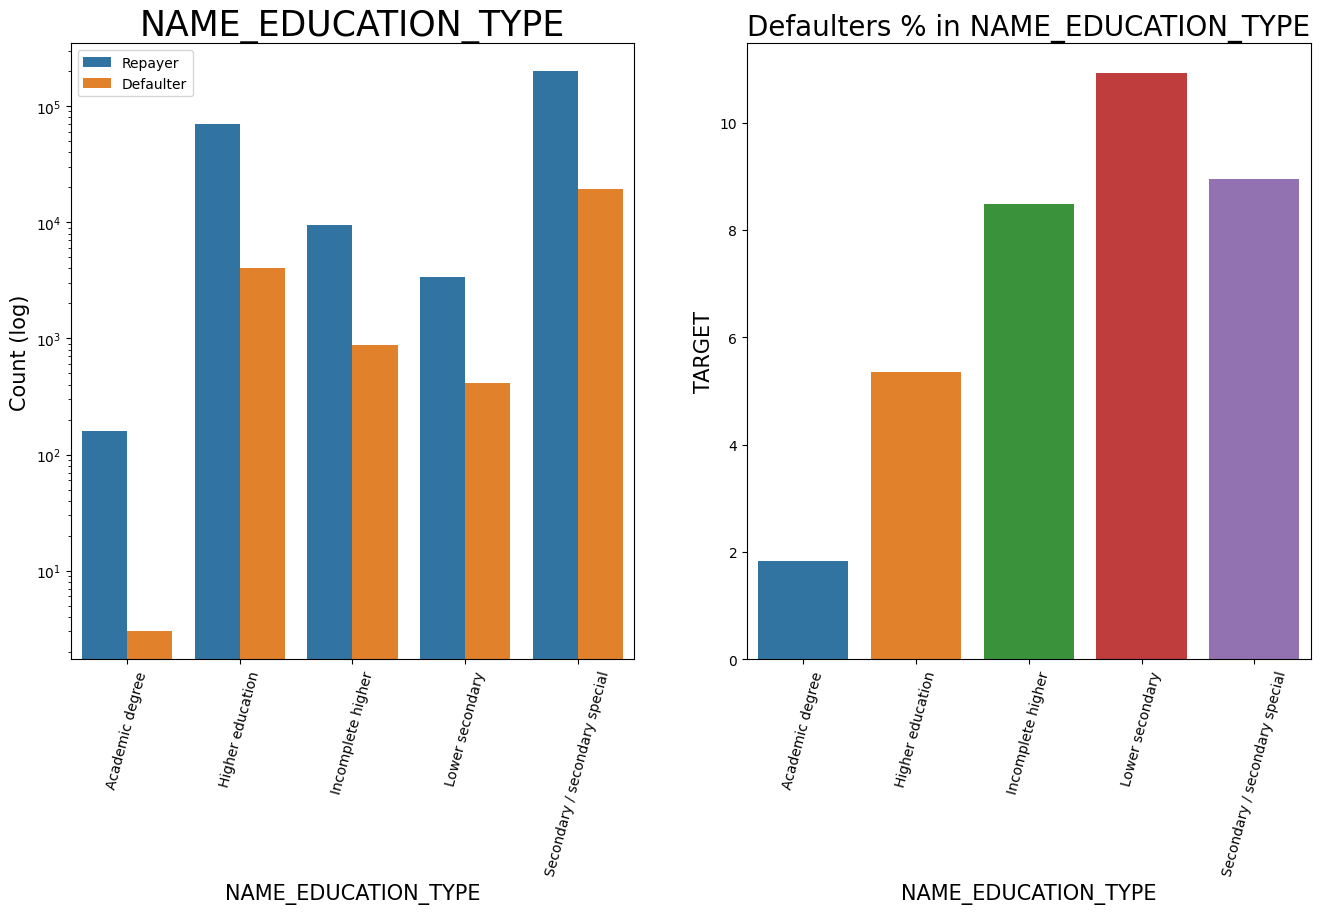

In [387]:
#6 Analyzing Education Type based on loan repayment status
univariate(appl_data,'NAME_EDUCATION_TYPE','TARGET',True,True,True)

**Insight**:
- Secondary/secondary special and higher education are 2 types of clients who applied loan the most
- Lower secondary has the highest rate of default
- People with academic degree are less likely to default

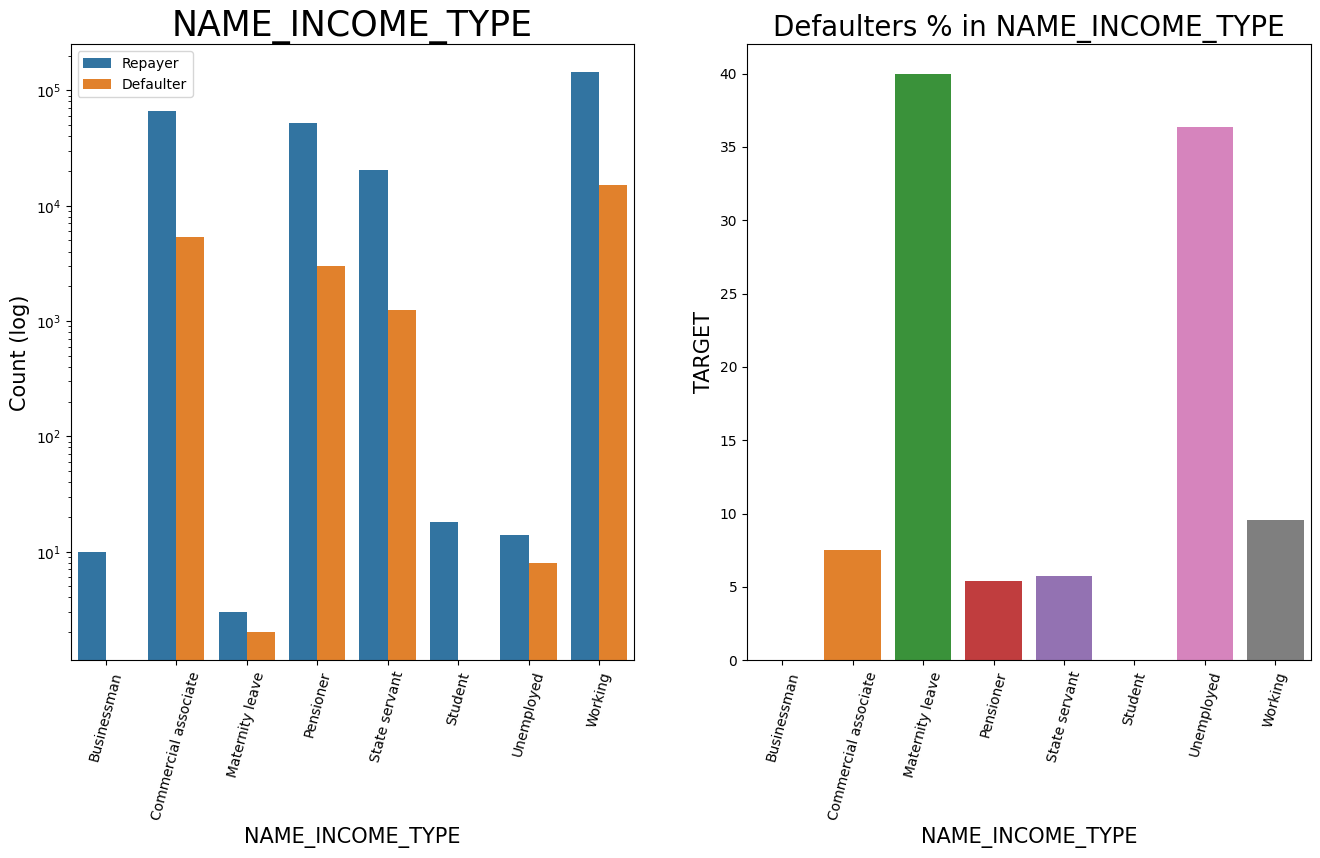

In [388]:
#7 Analyzing Income Type based on repayment status
univariate(appl_data,'NAME_INCOME_TYPE','TARGET',True,True,True)

**Insight**:
- Working class is the highest loan applicant, followed by commercial associate and Pensisioner
- Maternity leave are most likely to default, businessman and student are less likely to default. A safe choice for providing loans

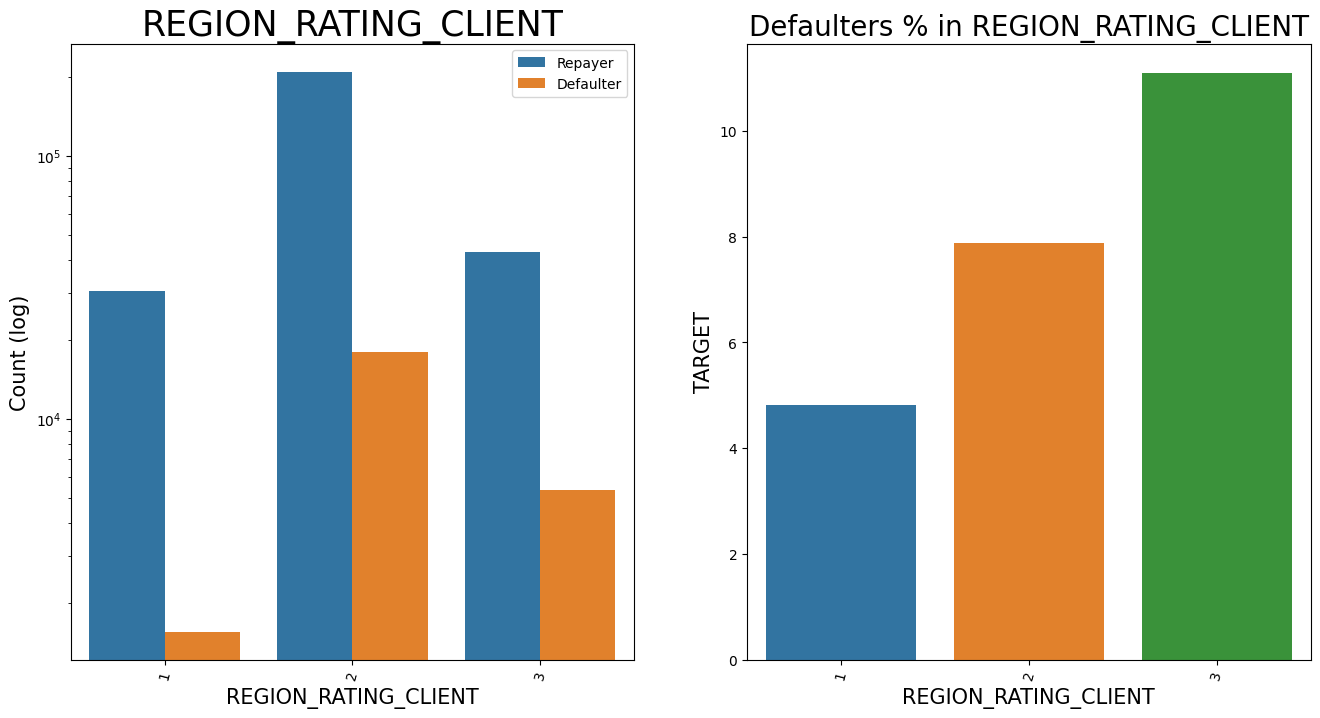

In [389]:
#8 Analyzing Region Rating where applicant lives based on repayment stat
univariate(appl_data,'REGION_RATING_CLIENT','TARGET',True,True,True)

**Insight**:
- Most of the loan applicant comes from Region 2
- Region 3 is highest in term of defaulter, region 1 is lowest. Thus it is safer when approving loans for this region.

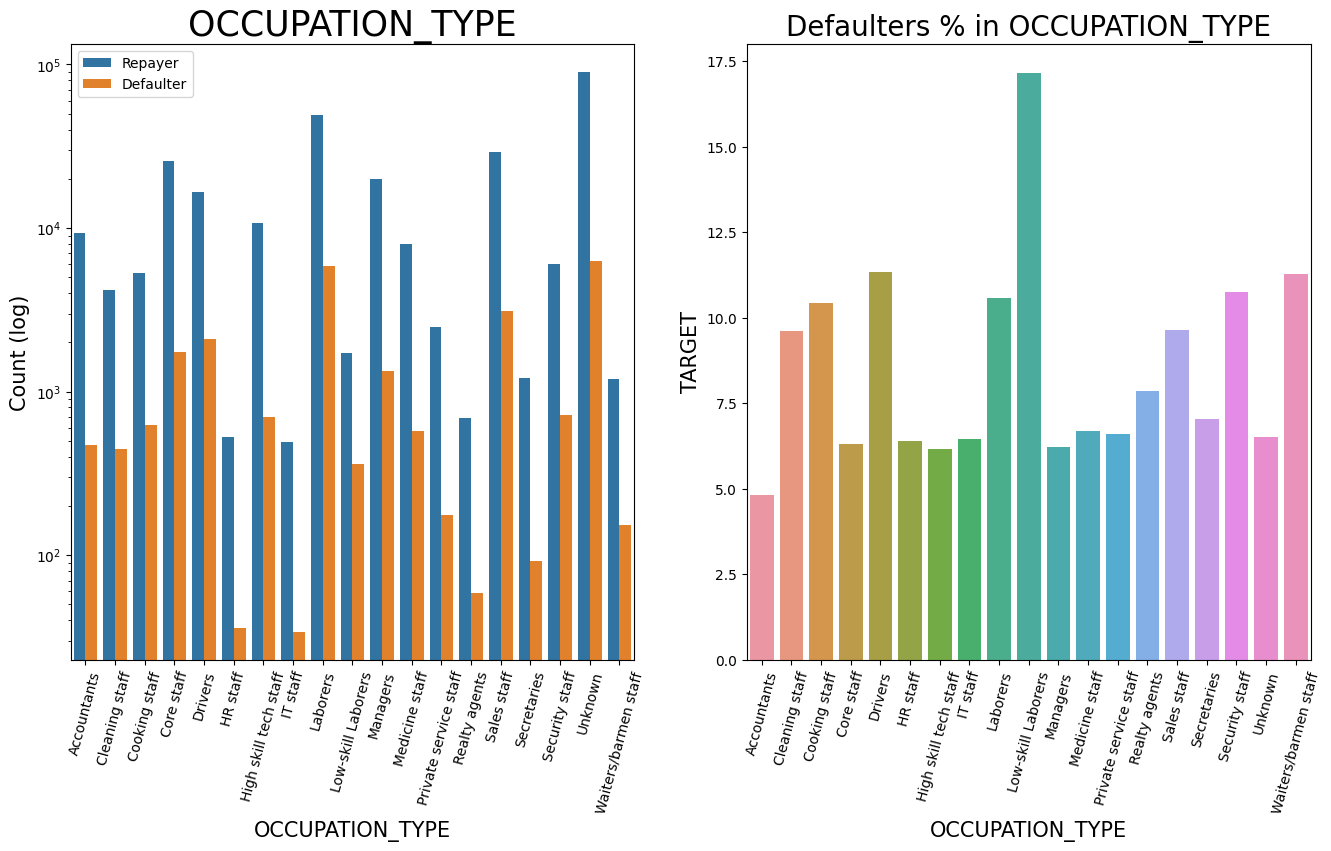

In [390]:
#9 Analyzing Occupation Type where applicant lives basesd on loan repayment stat
univariate(appl_data,'OCCUPATION_TYPE','TARGET',True,True,False)

**Insight:**
- unknown aside, most of the loan applicant is Laborer, followed by Sales staff
- Accountants are less likely to default and Low-skill Laborers is most likely to default

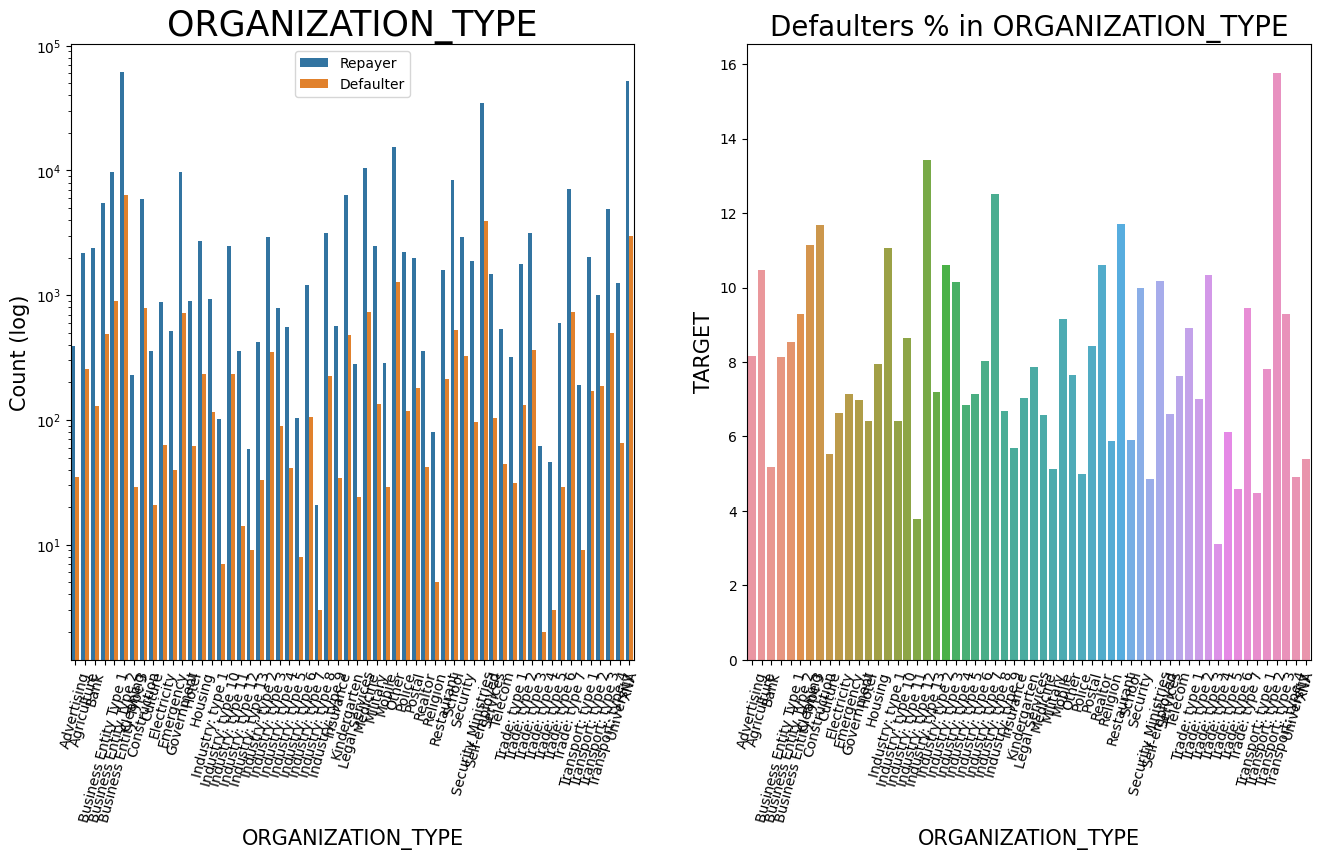

In [391]:
#10 Check based on Organization Type
univariate(appl_data,'ORGANIZATION_TYPE','TARGET',True,True,False)

Inferences: Organization Type

- Organizations with highest percent of defaultess are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
- Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.
- Most of the people application for loan are from Business Entity Type 3
- For a very high number of applications, Organization type information is unavailable(XNA)
- It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8

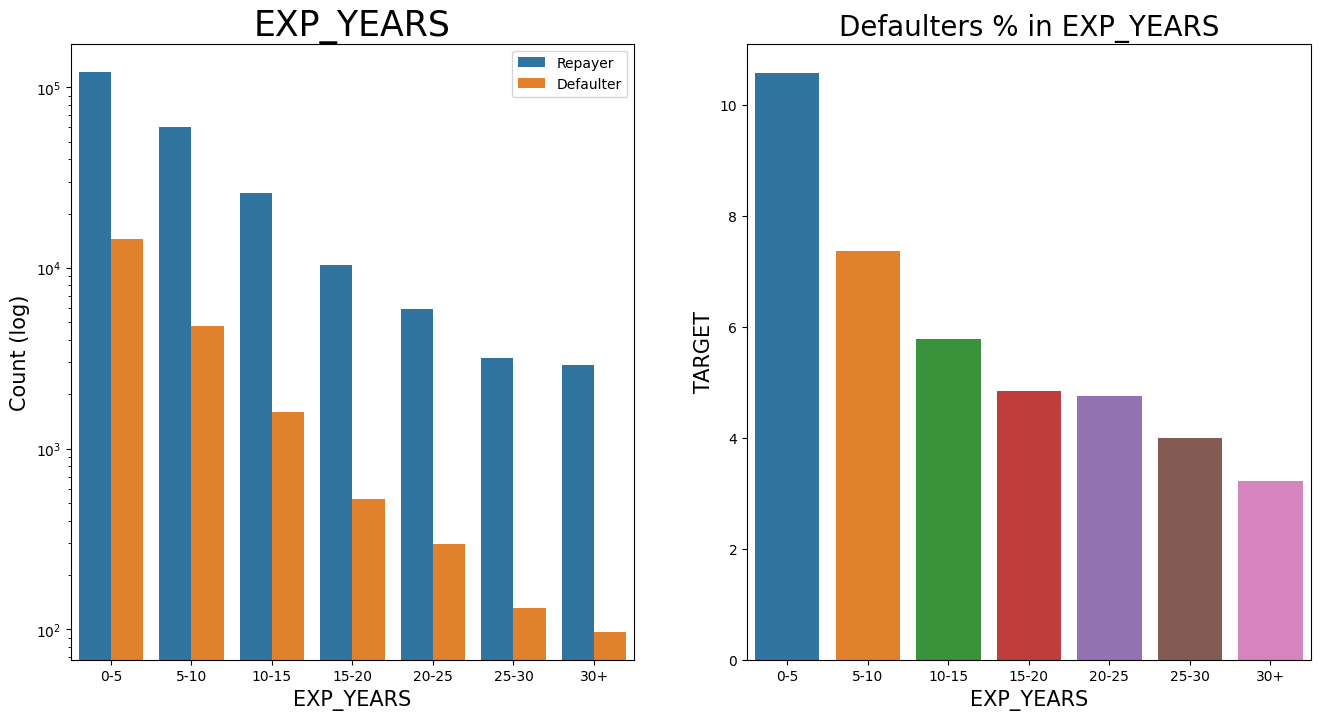

In [392]:
#11 Analyzing Employment_Year 
univariate(appl_data,'EXP_YEARS','TARGET',True,False,True)

**Insight**:
- Majority of employee who works 0-5 yrs are defaulter. This group also have the highest number of loan applicant
- The higher the exp year, the lower the default rate

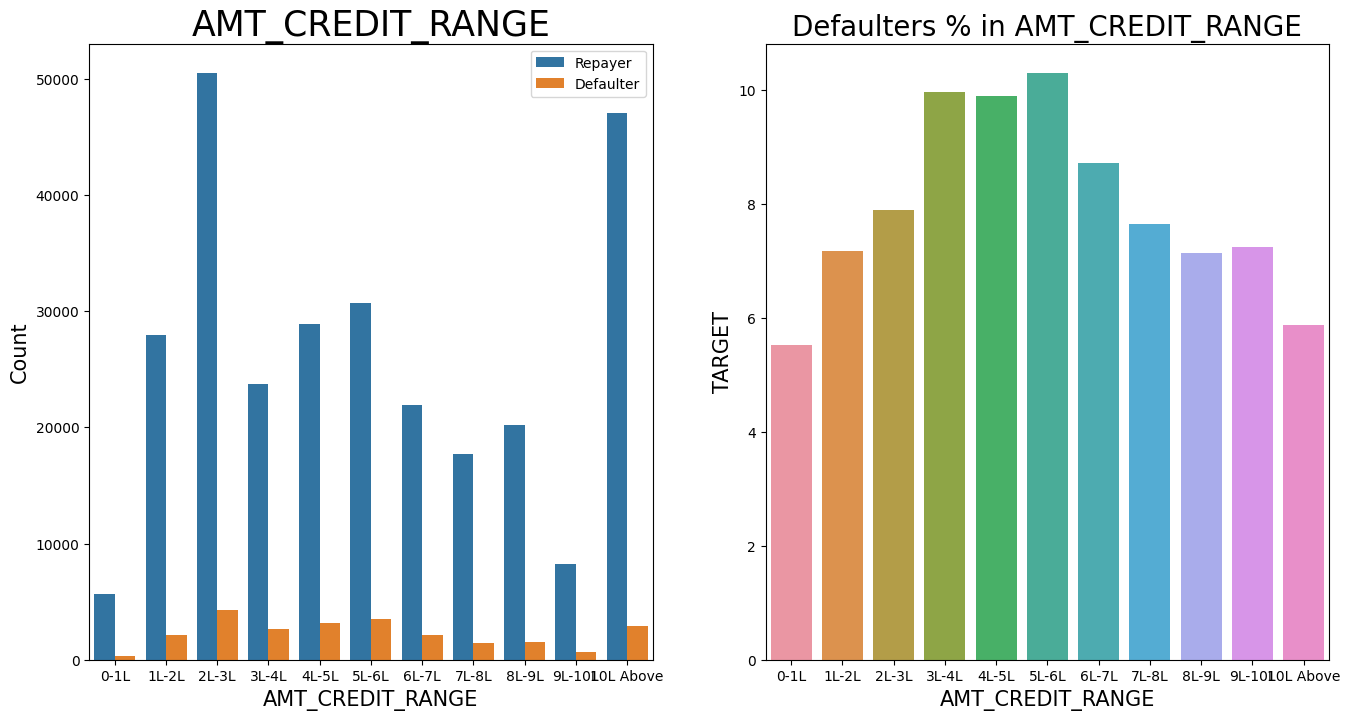

In [394]:
#12 Analyzing Amt_credit based on repayment stat
univariate(appl_data,'AMT_CREDIT_RANGE','TARGET',False,False,True)

**Insight:**
- A high number of applicant have loan in range of 2-3L, followed by 10l above
- People who have 5-6L credit are most likely to default

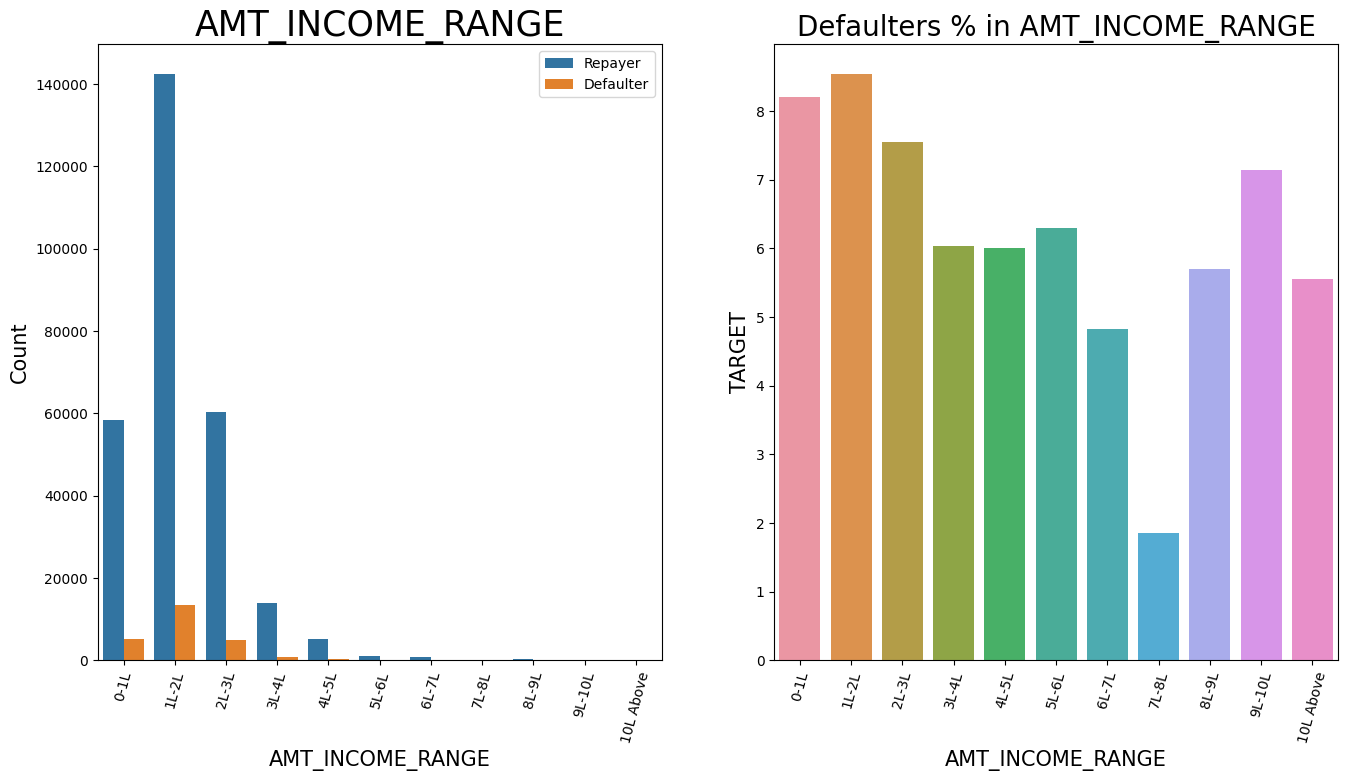

In [395]:
#13 Analyzing Amount_Income Range based on repayment status
univariate(appl_data,'AMT_INCOME_RANGE','TARGET',False,True,True)

**Insight:**
- Applicant with 1-2L income applied loan the most, most of the loan applicant have income range below 3L
- 1-2L income applicant has the highest proportion of default, while 7-8L has the lowest

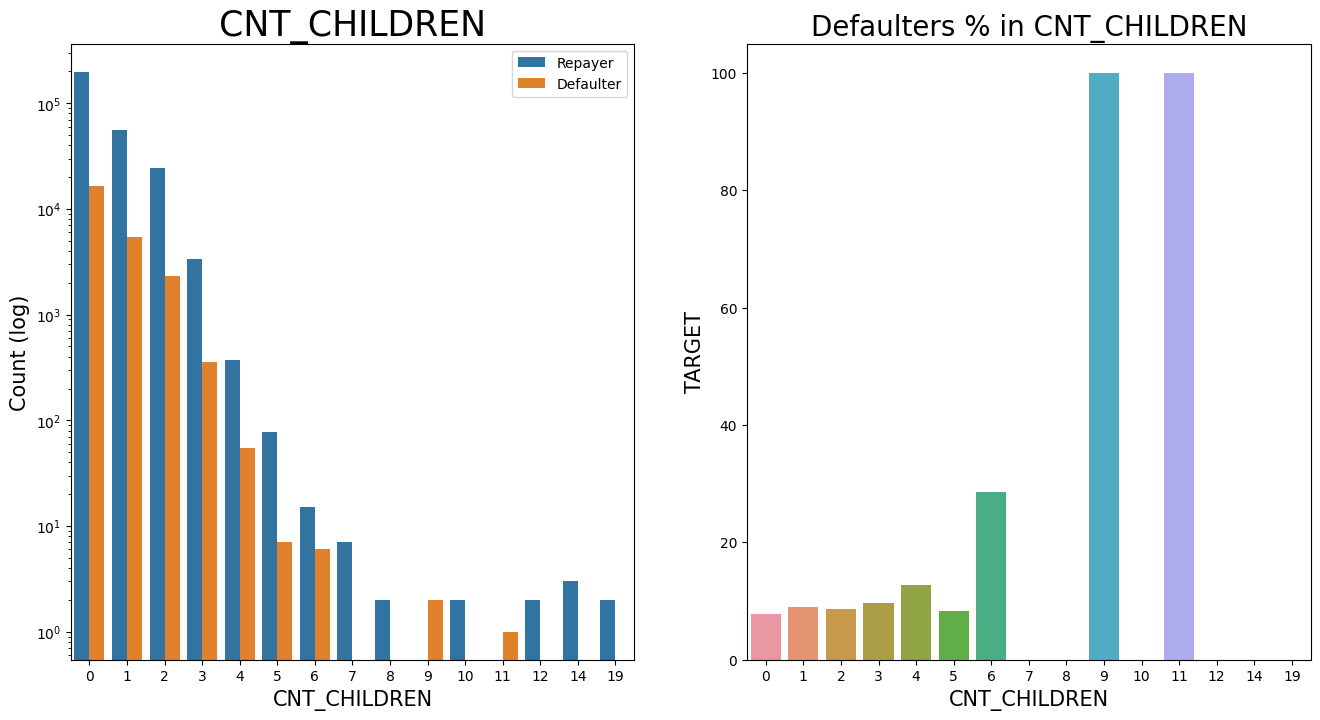

In [396]:
#14 Analyzing the number of children based on repayment stat
univariate(appl_data,'CNT_CHILDREN','TARGET',True,False,True)

**Insight:**
- Most of the applicant do not have child
- Applicant with 9 and 11 child are 100% likely to be defaulted

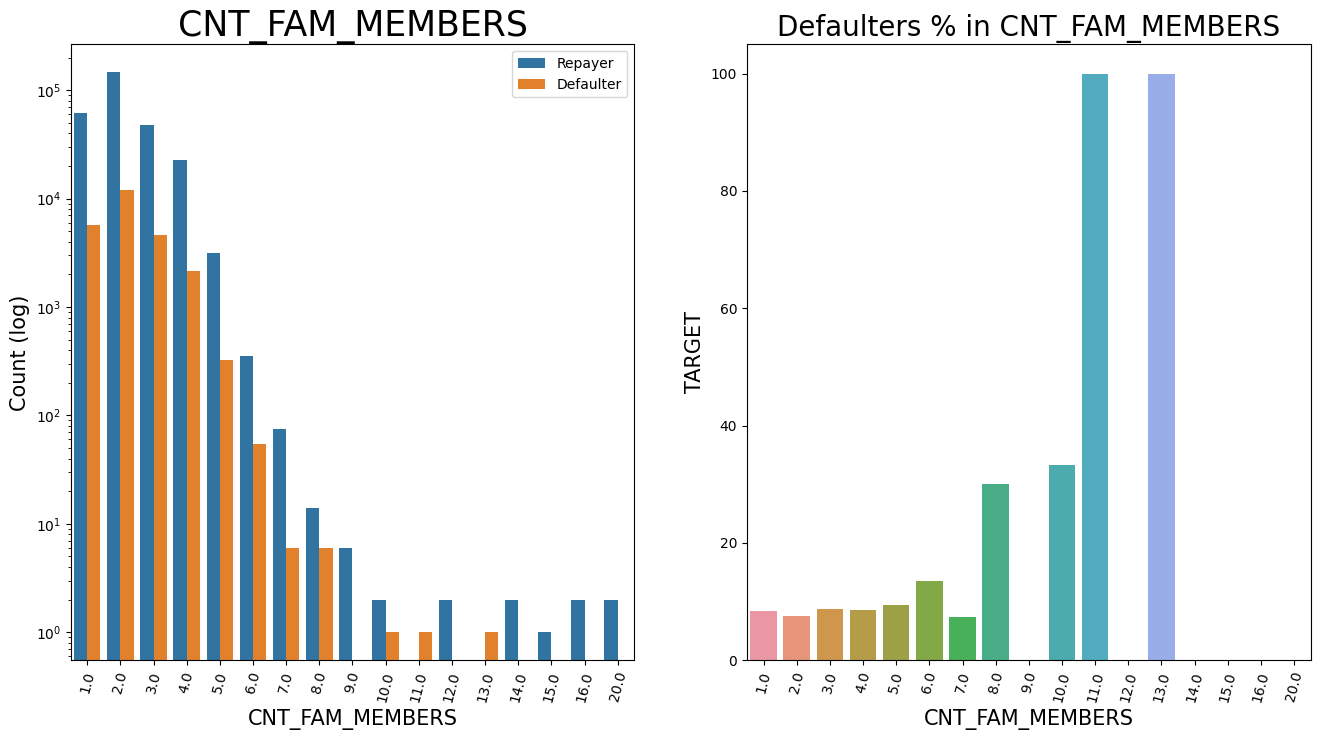

In [399]:
#15 Analyzing Number of Family member
univariate(appl_data,'CNT_FAM_MEMBERS','TARGET',True,True,True)

**insight:**
- Most applicant is having below 4 member in family, the highest is 2 members in family
- Applicant who have 11 and 13 members in family are 100% default rate
- Applicant who have more than 4 children are more likely to be defaulted

### 6.3.2 Categorical Bivariate or multivariate analysis


In [400]:
appl_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500  2.02500  1170.0000

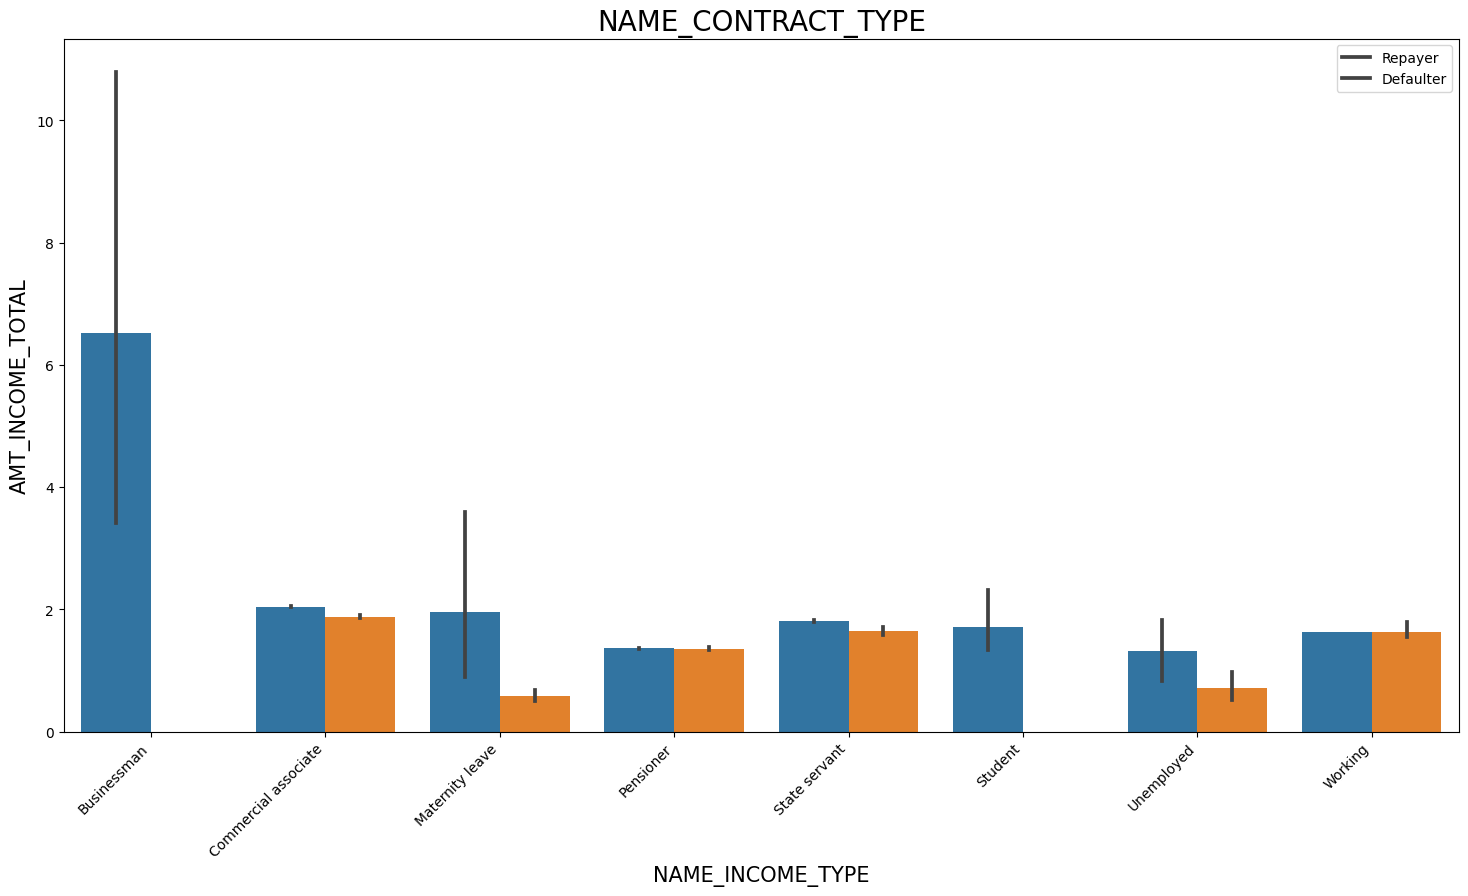

In [401]:
#Income type vs Income amt range
bivariate_c('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',appl_data,'TARGET',(18,9),['Repayer','Defaulter'])

bivariate_c: This is the name of the function that you've defined in your code. It's used to perform bivariate analysis between two specified columns.

'NAME_INCOME_TYPE': This is the first column you want to analyze. It's assumed that 'NAME_INCOME_TYPE' contains information about the income type of applicants.

'AMT_INCOME_TOTAL': This is the second column you want to analyze. It's likely that 'AMT_INCOME_TOTAL' represents the total income of applicants.

appl_data: This is the DataFrame you want to analyze. It's assumed that appl_data contains your dataset.

'TARGET': This is the name of the target column. The analysis will likely involve comparing 'NAME_INCOME_TYPE' and 'AMT_INCOME_TOTAL' with the values in the 'TARGET' column to understand how income type and income total relate to the target variable.

(18, 9): These are the dimensions (width and height) for the figure or plot. The (18, 9) tuple suggests that you want the resulting plot to have a width of 18 units and a height of 9 units.

['Repayer', 'Defaulter']: This is a list of labels ('Repayer' and 'Defaulter') that will likely be used in the plot to represent different categories or groups within the 'TARGET' variable. These labels help differentiate between different categories when visualizing the data.

Overall, the bivariate_c function appears to be designed to generate a bivariate analysis plot or visualization between 'NAME_INCOME_TYPE' and 'AMT_INCOME_TOTAL' with respect to the 'TARGET' variable in the appl_data DataFrame. The specific details of how the function performs this analysis, the type of plot it generates, and any additional customization may depend on the implementation of the bivariate_c function in your code.

**Insight:**
- It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

### 6.3.3 Numeric Variables Analysis

Divided the appl_data dataframe based on 'TARGET' value 0 and 1 for correlation and other analysis

In [402]:
#Listing all the cols in the dataframe
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU

In [403]:
# divide the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = appl_data.loc[appl_data['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = appl_data.loc[appl_data['TARGET']==1, cols_for_correlation]

The provided code segments involve splitting the appl_data DataFrame into two separate DataFrames based on the values in the 'TARGET' column. This kind of separation is often done for further analysis or correlation calculations, particularly in the context of binary classification problems, where 'TARGET' often represents the target variable indicating whether an applicant defaulted (1) or repaid (0).

Let's break down the code and explain each part:

- cols_for_correlation List: 
   - This list contains the names of columns (features) from the appl_data DataFrame that are selected for correlation and other analyses. These columns are presumably considered relevant or informative for the analysis.

- Repayer DataFrame (Repayer_df):
    - Repayer_df is created as a new DataFrame to hold data related to applicants who are classified as "repayers" (where 'TARGET' == 0).
    - appl_data['TARGET'] == 0 is used as a filter to select rows where the 'TARGET' column equals 0, representing applicants who repaid their loans.
    - cols_for_correlation is used to select specific columns from the original DataFrame for this subset. This is done to focus on the selected columns for correlation analysis.

- Defaulter DataFrame (Defaulter_df):
    - Defaulter_df is created as a new DataFrame to hold data related to applicants who are classified as "defaulters" (where 'TARGET' == 1).
    - appl_data['TARGET'] == 1 is used as a filter to select rows where the 'TARGET' column equals 1, representing applicants who defaulted on their loans.
    - Similar to Repayer_df, cols_for_correlation is used to select specific columns from the original DataFrame for this subset.

The result is two separate DataFrames: Repayer_df containing data for applicants who repaid their loans and Defaulter_df containing data for applicants who defaulted on their loans. These DataFrames can then be used for various types of analysis, including correlation analysis, to understand how different features correlate with the loan repayment status (repayer or defaulter). This separation allows for targeted analysis and insights into factors that may influence loan repayment behavior.

In [404]:
len(cols_for_correlation)

41

***We check the correlation between numeric variables***

In [413]:
# Select only numeric columns for correlation
numerical_columns = Repayer_df.select_dtypes(include=np.number)
# Calculate correlations for numerical columns
corr_repayer = numerical_columns.corr()

corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
64     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
65     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
43         AMT_ANNUITY        AMT_CREDIT     0.771309
131      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
42         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
63     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
21          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
152  DAYS_REGISTRATION        DAYS_BIRTH     0.333151
174    DAYS_ID_PUBLISH     DAYS_EMPLOYED     0.276663
173    DAYS_ID_PUBLISH        DAYS_BIRTH     0.271314

The provided code is used to calculate and filter the correlations between variables (features) in the Repayer_df DataFrame (which contains data for applicants who repaid their loans). It then creates a DataFrame to store these correlations and presents the top correlated pairs. Let's break down the code step by step:

The Repayer_df.corr() method on the Repayer_df DataFrame, **which contains both numerical and categorical columns. To resolve this issue, we should only calculate correlations for numerical columns, excluding categorical columns**. This modification ensures that you are calculating correlations only for numeric variables and excludes categorical columns like 'NAME_CONTRACT_TYPE', 'CODE_GENDER', and others, which cannot be used in correlation calculations without appropriate preprocessing or encoding.

- numerical_columns is selected using select_dtypes with include=np.number to ensure only numeric columns are considered.
The correlation matrix is calculated for these numerical columns.

- corr_df_repayer=corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1)).astype(np.bool).unstack().reset.index():

    - This line filters the correlation matrix to obtain only the upper triangular part (excluding the diagonal) because correlations are symmetric, and we are typically interested in unique correlations.
    - np.triu(np.ones(corr_repayer.shape), k=1) creates a boolean mask for the upper triangle of the correlation matrix.
    - .where() is used to apply this mask to the entire corr_repayer matrix, setting values outside the upper triangle to NaN.
    - .astype(np.bool) converts the filtered matrix to boolean values.
    - .unstack() reshapes the matrix into a multi-indexed DataFrame.
    - .reset_index() resets the index of the DataFrame.

- corr_df_repayer.columns=['VAR1','VAR2','Correlation']:

    - This line renames the columns of the DataFrame to 'VAR1', 'VAR2', and 'Correlation', representing the names of the variables involved in each correlation pair and the correlation value, respectively.

- corr_df_repayer.dropna(subset=['Correlation'], inplace=True):

    - This line removes rows with missing values in the 'Correlation' column. Since np.triu() sets values outside the upper triangle to NaN, this step removes those entries.

- corr_df_repayer['Correlation']=corr_df_repayer['Correlation'].abs():

    - This line takes the absolute value of the 'Correlation' column to ensure that the correlations are considered in magnitude (ignoring the direction of the correlation).

- corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True):

    - This line sorts the DataFrame in descending order based on the 'Correlation' column, so the pairs with the highest absolute correlations appear at the top.

- corr_df_repayer.head():

    - Finally, this line displays the top rows of the corr_df_repayer DataFrame, showing the pairs of variables with the highest absolute correlations.
The resulting DataFrame, corr_df_repayer, contains information about the variable pairs and their absolute correlation values, sorted in descending order. This information can be useful for identifying which variables in the Repayer_df DataFrame have the strongest relationships with each other in terms of correlation.

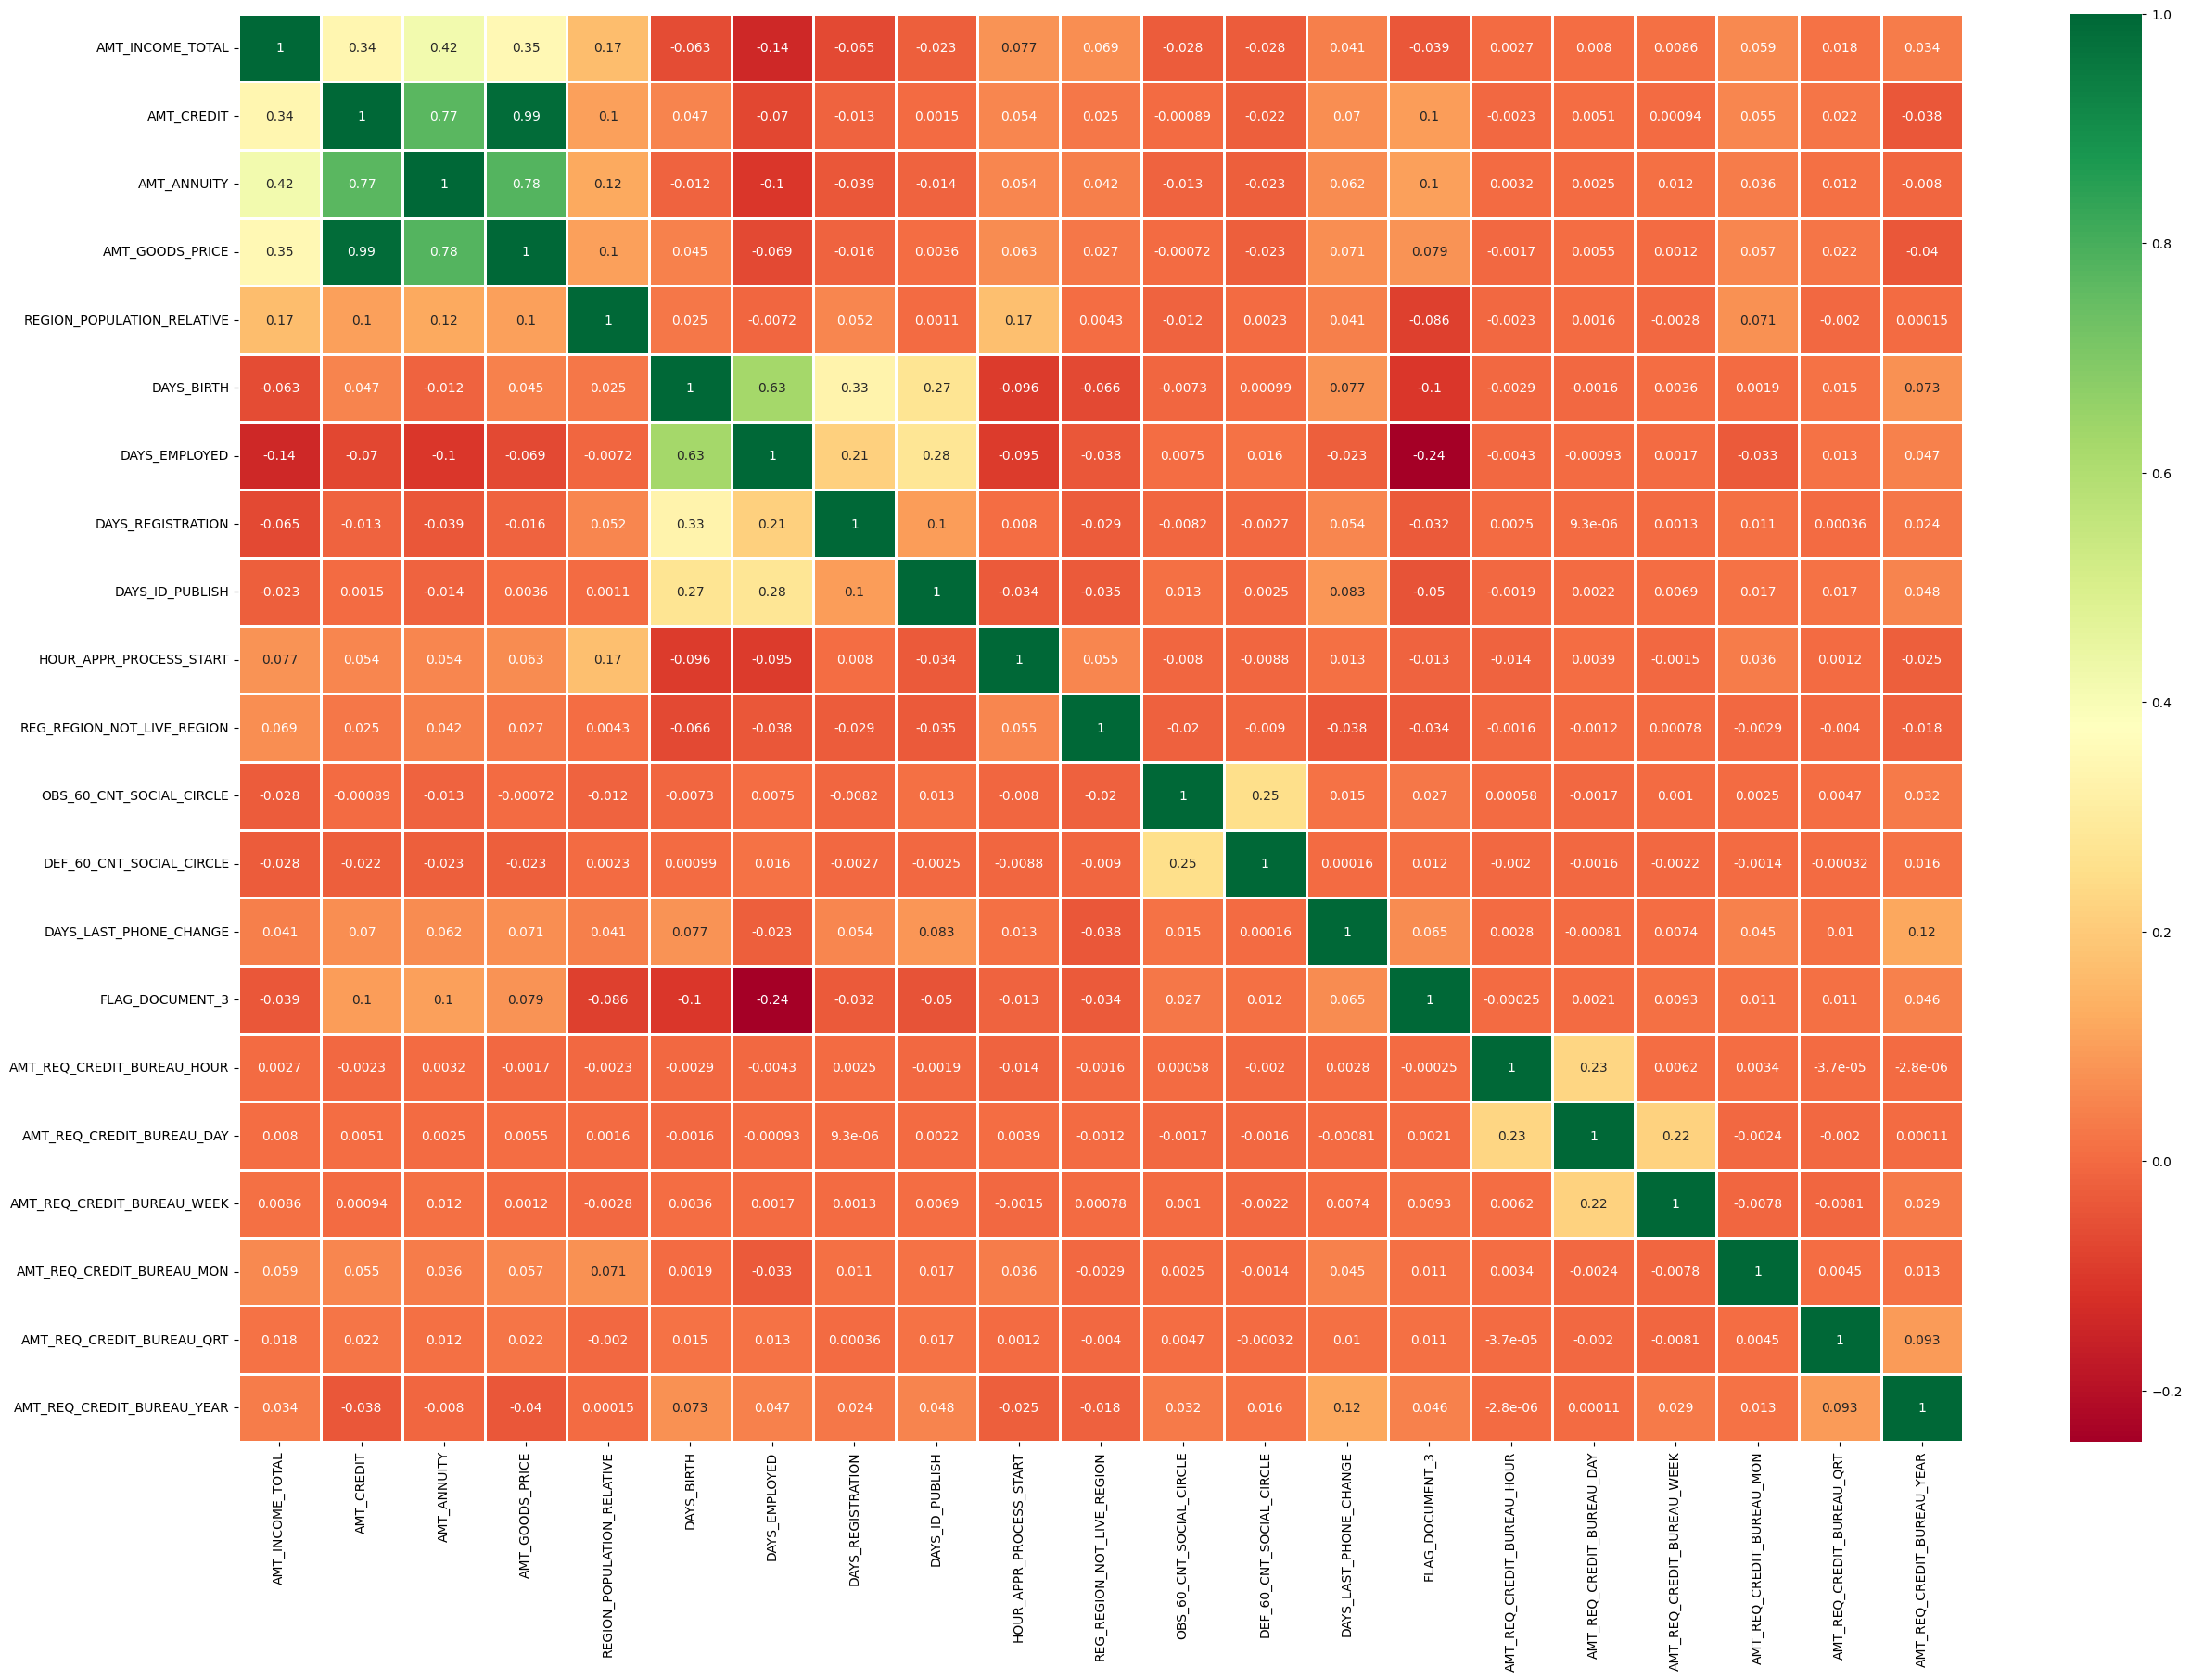

In [416]:
#Plotting heatmap to visualize the linear correlation
fig=plt.figure(figsize=[30,20])
ax=sns.heatmap(numerical_columns.corr(),cmap='RdYlGn',annot=True,linewidth=1)

**Insight:**
- Correlation amongst repayer:
1. Credit amt is highly correlated with:
- Goods price amt
- Loan anuity
- Total income

2. We can see that repayers have a high correlation in number of days employed

In [419]:
# Select only numeric columns for correlation first
numerical_columns_defaulter = Defaulter_df.select_dtypes(include=np.number)

# Show the top 10 correlation for the defaulter data
corr_Defaulter = numerical_columns_defaulter.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

VAR1                        VAR2  Correlation
64             AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
65             AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
43                 AMT_ANNUITY                  AMT_CREDIT     0.752195
131              DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
152          DAYS_REGISTRATION                  DAYS_BIRTH     0.289114
300            FLAG_DOCUMENT_3               DAYS_EMPLOYED     0.272169
263   DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.264159
173            DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863
351  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR     0.247511
174            DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.229090

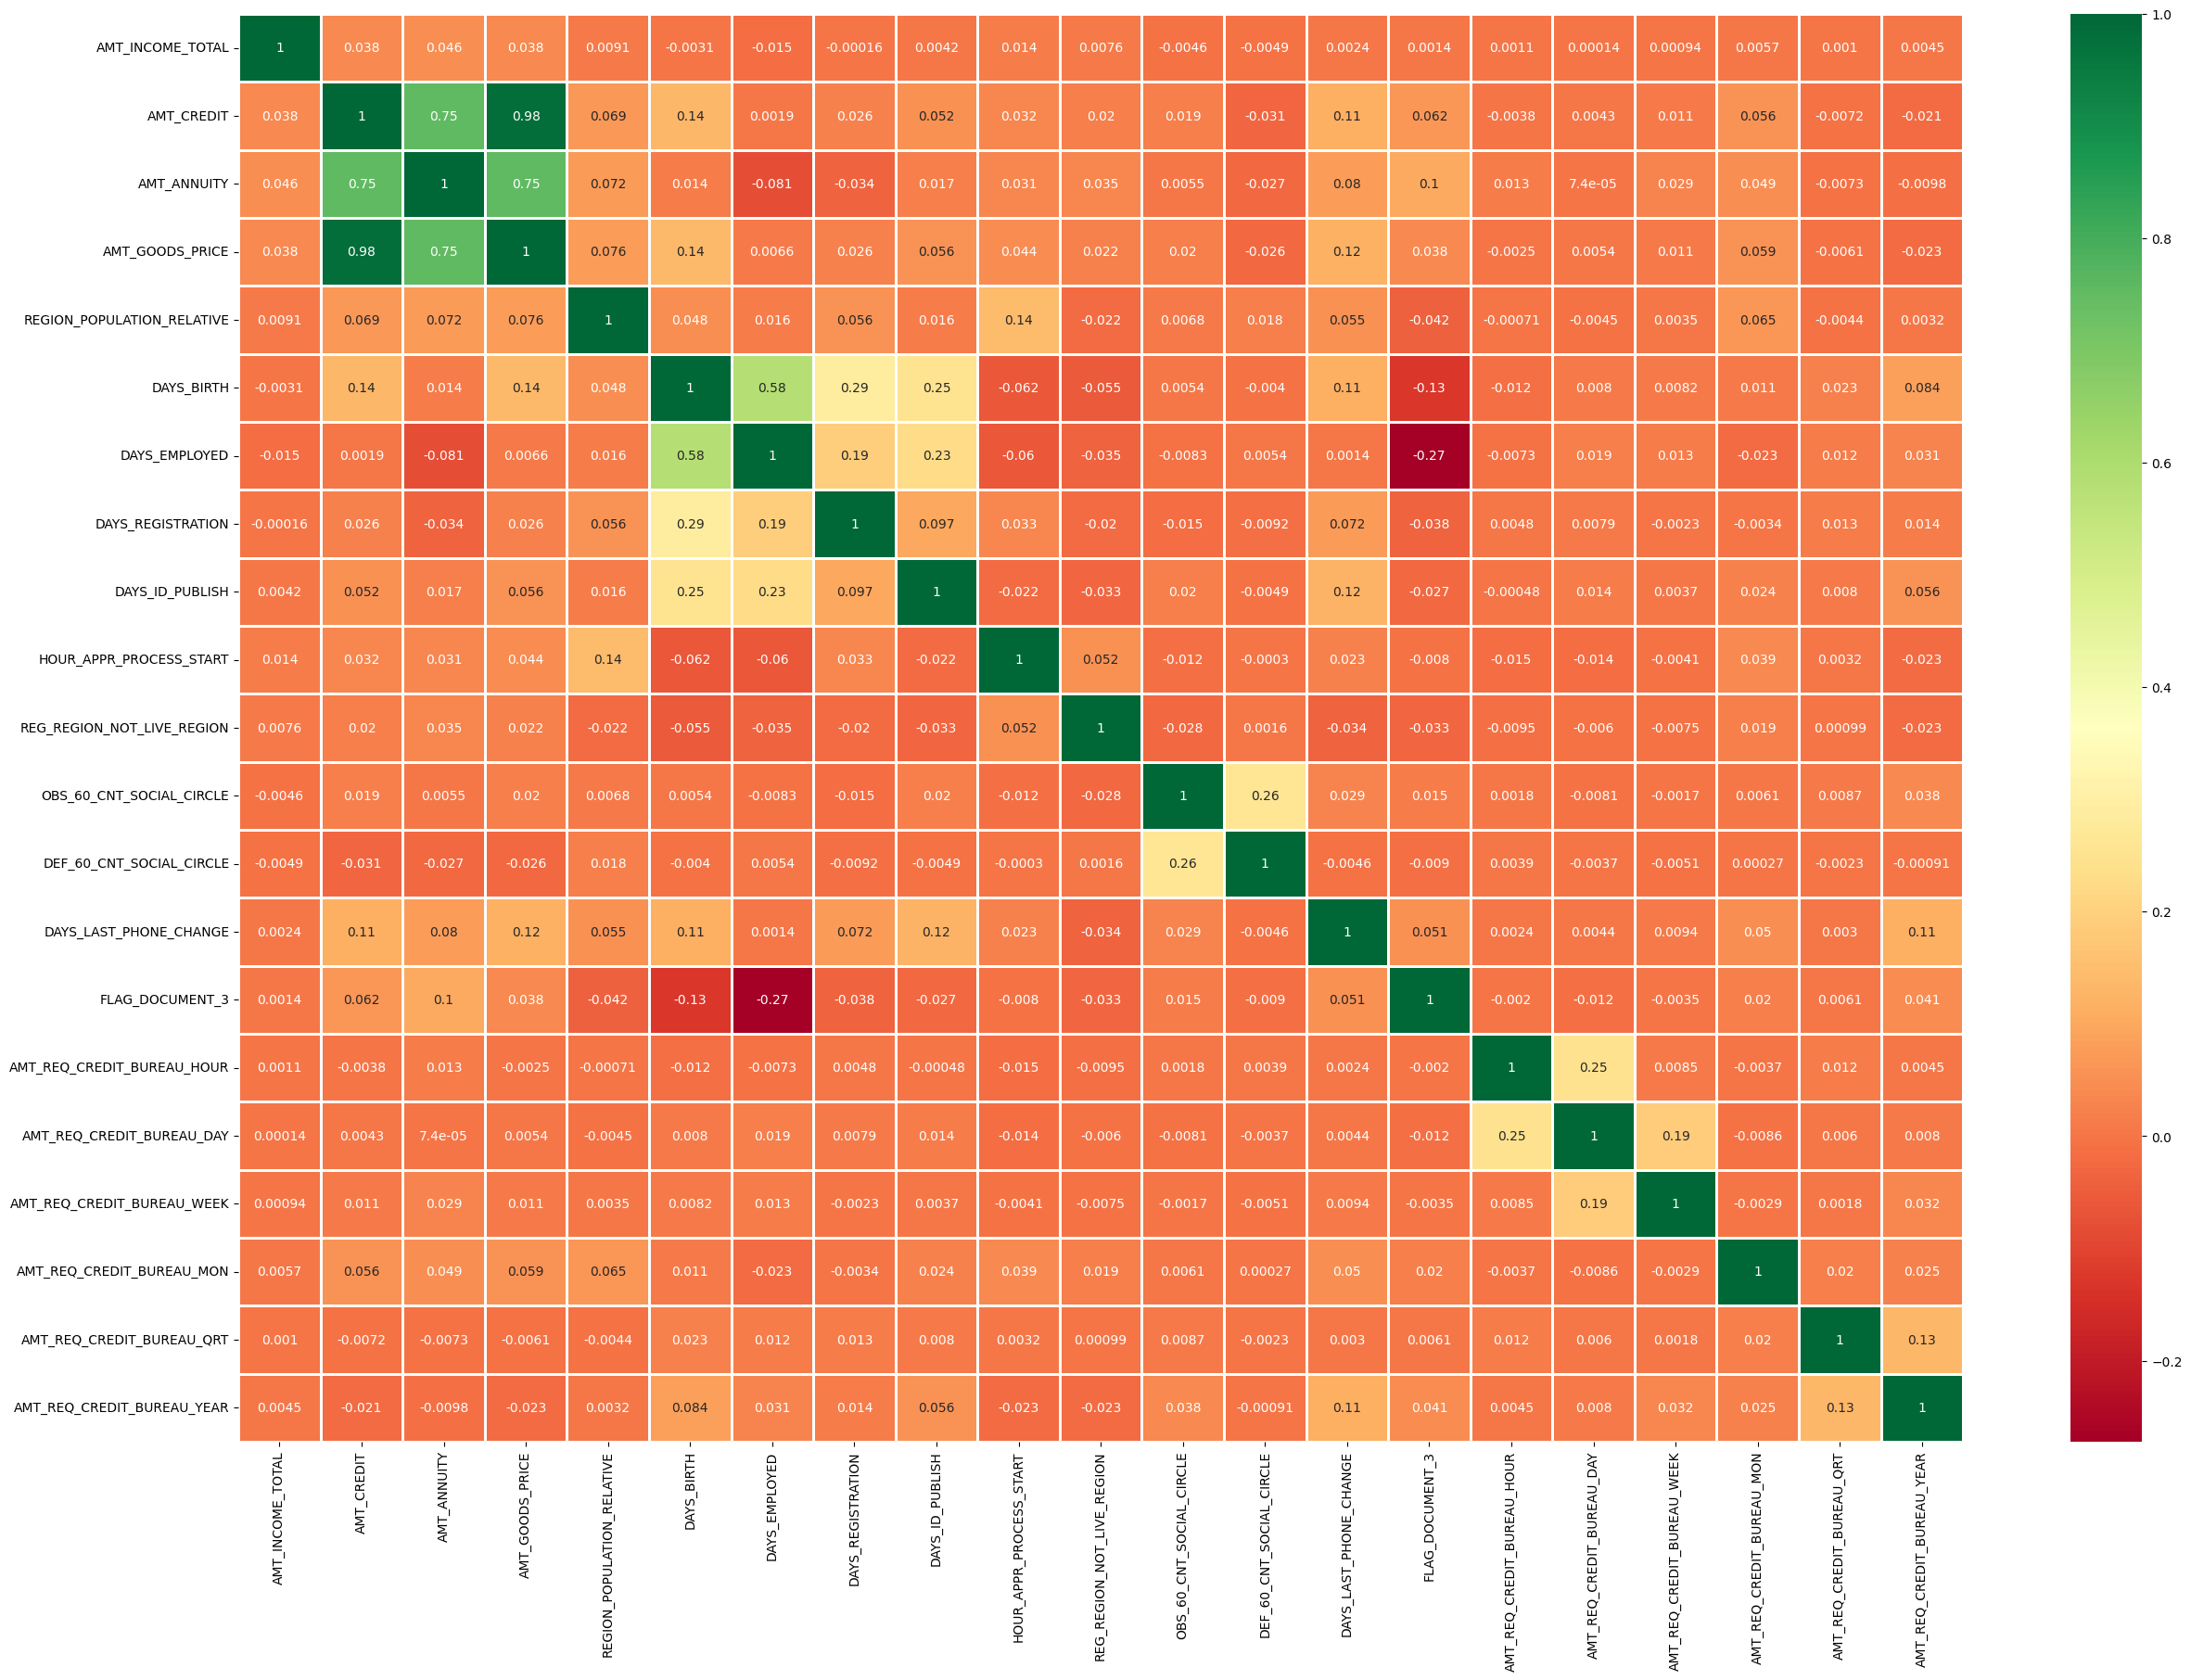

In [421]:
# Visualize in heatmap
fig=plt.figure(figsize=[30,20])
ax=sns.heatmap(numerical_columns_defaulter.corr(),cmap='RdYlGn',annot=True,linewidth=1)

**Insight:**
- Credit amount is highly correlated with good price amount which is same as repayers.
- Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
- We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
- There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
- Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
- There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

### 6.3.4. Numerical Univariate Analysis

In [423]:
columns_with_amt = [col for col in appl_data if 'AMT' in col] # find all AMT cols
columns_with_amt

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'AMT_GOODS_PRICE_RANGE']

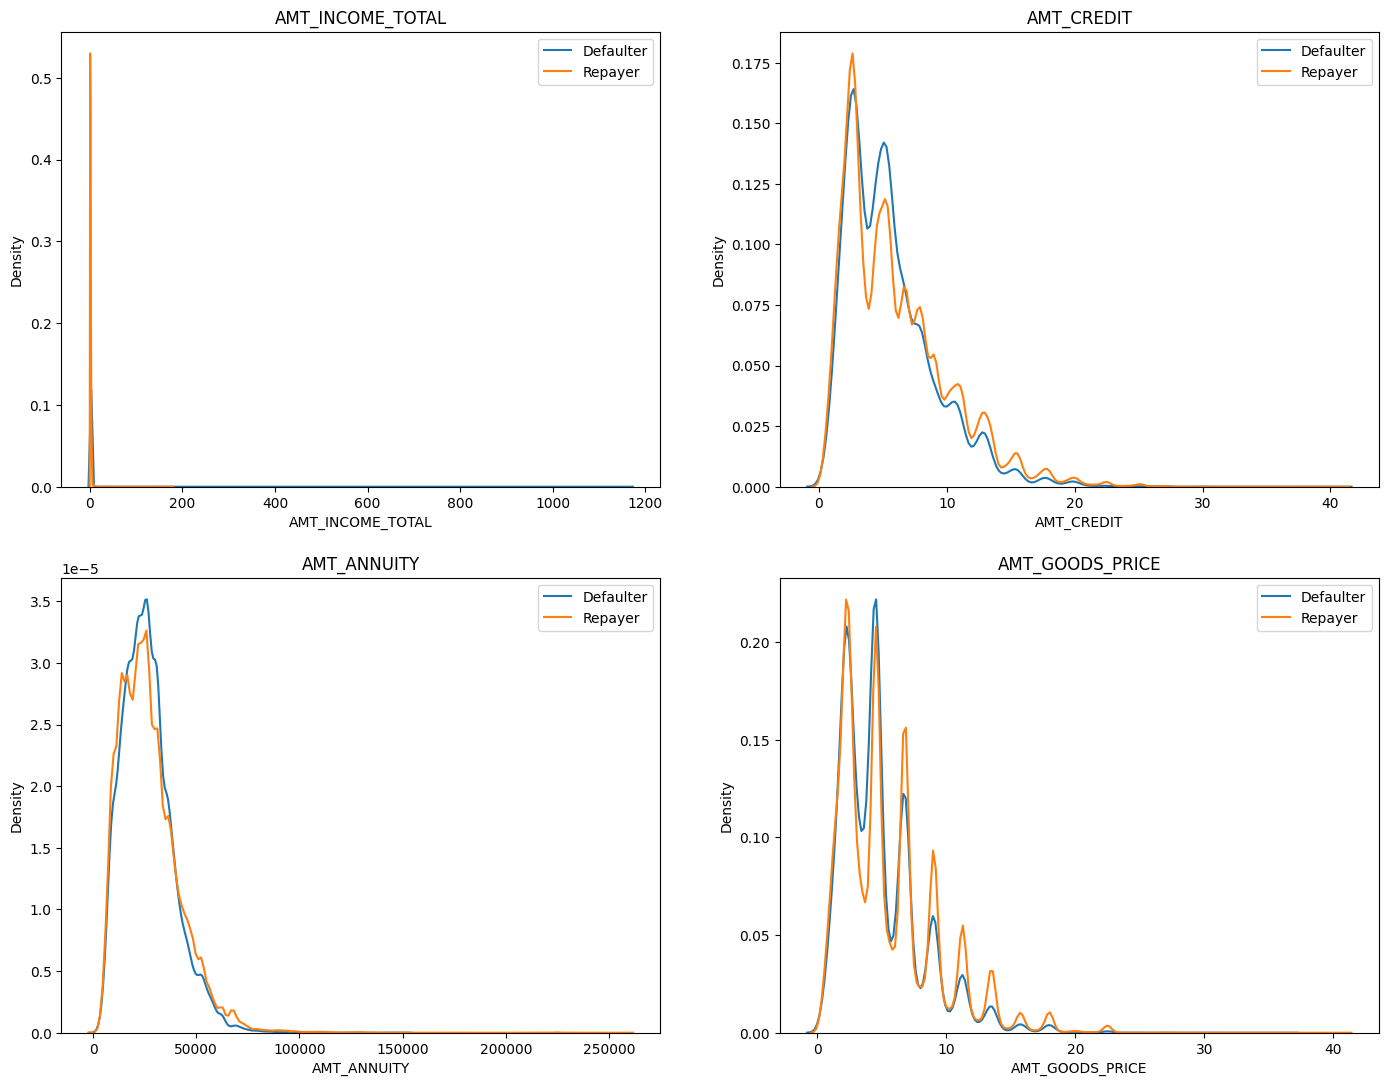

In [424]:
# Plotting the numerical cols related to amt as distribution plot to see the density, as the correlated relationship in above analysis
amount= appl_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
fig=plt.figure(figsize=(17,13))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]],hist=False,label='Defaulter')
    sns.distplot(Repayer_df[i[1]],hist=False,label='Repayer')
    plt.title(i[1])
    plt.legend()

**Code explaination:**
1. Columns selection
This line selects and creates a new DataFrame called amount, containing only the four columns of interest: 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', and 'AMT_GOODS_PRICE'. These columns likely represent different financial attributes of loan applicants.

2. Creating the Figure:
This line creates a new figure (plotting area) with a specified size of 17 inches in width and 13 inches in height.

3. Looping Through Columns:
This for loop iterates through the selected columns within the amount DataFrame. The enumerate function is used to get both the index of the column (0, 1, 2, 3) and the column name ('AMT_INCOME_TOTAL', 'AMT_CREDIT', etc.).

4. Creating Subplots:
This line creates subplots within the figure. It specifies a 2x2 grid of subplots (2 rows and 2 columns) and selects the subplot indexed by i[0] + 1, where i[0] is the column index obtained from enumerate. This effectively arranges the subplots in a 2x2 grid.

5. Creating Distribution Plots:
    - These lines use seaborn's distplot function to create distribution plots for the current column. Defaulter_df[i[1]] represents the data for defaulters in the current column, and Repayer_df[i[1]] represents the data for repayers in the current column.
    - The hist=False parameter is used to plot the distribution as a smooth curve without the histogram bars.
    - Labels ('Defaulter' and 'Repayer') are added to the plots to distinguish between the two groups.

**Insight:**
- Most number of loans are given to goods price below 10L
- Most people pay annuity below 50k for the credit loans
- The defaulter and repayer distribution line is overlap in all graph so we can not use any of these vars to make a isolated decision

### 6.3.4. Numerical bivariate analysis

<Figure size 1500x1500 with 0 Axes>

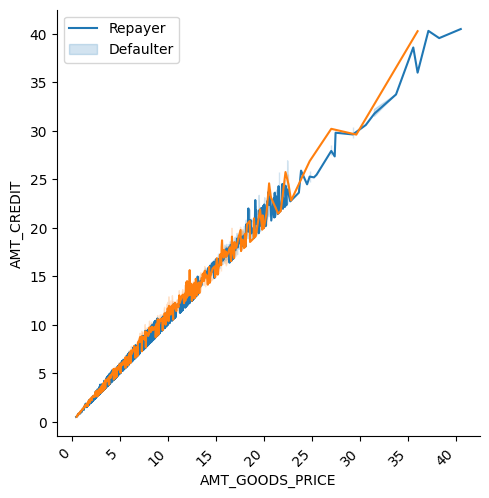

In [425]:
# Checking the relationship between Goods price and credit and comparing with loan repayment stat
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',appl_data,'TARGET','line',['Repayer','Defaulter'])

**Insight:**
- When the credit goes beyond 30L, defaulter number increase sharply

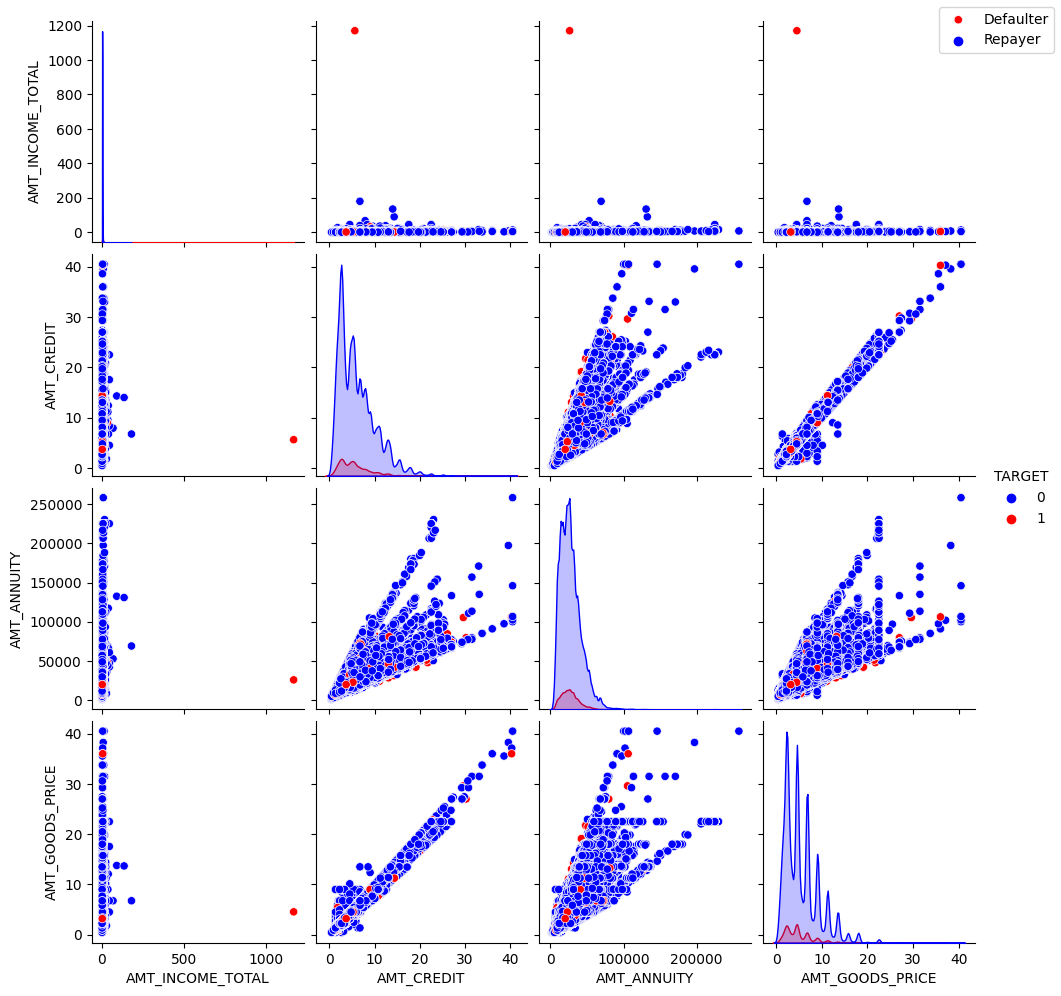

In [427]:
# Plotting pairplot between amt variable to draw references agaisnt loan payment stat
amount=appl_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount['AMT_GOODS_PRICE'].notnull()) & (amount['AMT_ANNUITY'].notnull())]

ax = sns.pairplot(amount,hue='TARGET',palette=['b','r'])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

**Insight:**
- When annuity amt > 15K and Goods price amt > 20L, there is a lesser chance of defaulter
- AMT_CREDIT and AMT_GOODS_PRICE are highly correlated since the scatter plot are consolidated in form of a line
 - There are less defautler for AMT_CREDIT > 20L

**Code explain:**
1. Column Selection:
This line selects a subset of columns from the appl_data DataFrame. It includes the columns 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', and 'TARGET'. These columns likely represent various financial attributes of loan applicants, and 'TARGET' indicates whether an applicant is a defaulter (1) or a repayer (0).

2. Data Filtering:
This line filters the amount DataFrame to include only rows where both the 'AMT_GOODS_PRICE' and 'AMT_ANNUITY' columns have non-null values. This step ensures that you're working with rows of data that have complete information for these two columns.

3. Creating a Pairplot:

This line uses the seaborn function pairplot to create a grid of scatterplots. Each scatterplot in the grid shows the relationship between two numeric columns.
The amount DataFrame is used as the data source for the pairplot.
hue='TARGET' is specified to color the points in the scatterplots based on the 'TARGET' column. This allows you to distinguish between defaulters (red) and repayers (blue).
The palette parameter specifies the colors to be used for the 'TARGET' categories, with 'b' for blue (repayer) and 'r' for red (defaulter).

4. Legend Addition:
This line adds a legend to the pairplot, indicating which color corresponds to 'Defaulter' and 'Repayer' in the scatterplots.
The resulting pairplot visually displays the pairwise relationships between the selected numeric columns for defaulters and repayers. It helps you explore how these financial attributes relate to each other and how they might differ between the two groups. Points in the scatterplots are color-coded to represent the target categories, making it easier to identify patterns and differences in the data.

# 7. Merged dataframe analysis

In [430]:
# merge both the dataframe on SK_ID_CURR with Inner join
loan_df = pd.merge(appl_data,prev_appl,how='inner',on='SK_ID_CURR')
loan_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE        AGE AGE_GROUP  YEAR_EMPLOYED EXP_YEARS  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL YEARLY_DECISION
0      100002       1           Cash loans           M               Y            0             2.025      4.065975        24700.5              3.510     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120           1        Laborers             1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0            2L-3L            4L-5L                 3L-4L  25.920548     25-30       1.745205       0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP           Unknown              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest            365243.0           565.0                      125.0           25.0              17.0                        0.0               2
1      100003       0           Cash loans           F               N            0             2.700     12.935025        35698.5             11.295            Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291           1      Core staff             2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0              

In [432]:
# Check the detail of the merge form
loan_df.shape

(1413701, 82)

In [433]:
#check the cols and cols type of the df
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 82 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_REALTY              1413701 non-null  category
 5   CNT_CHILDREN                 1413701 non-null  category
 6   AMT_INCOME_TOTAL             1413701 non-null  float64 
 7   AMT_CREDIT_x                 1413701 non-null  float64 
 8   AMT_ANNUITY_x                1413608 non-null  float64 
 9   AMT_GOODS_PRICE_x            1412493 non-null  float64 
 10  NAME_TYPE_SUITE_x            1410175 non-null  category
 11  NAME_INCOME_TYPE             1413701 non-null  category
 12  NAME_EDUCATION_TYPE         

In [435]:
# Divide te 'loan_df' based on target value 0 and 1 for corr and other analysis
L0 = loan_df[loan_df['TARGET']==0] # Repayer
L1 = loan_df[loan_df['TARGET']==1] # Defaulter

**Plot Contract Status vs Purpose of the loan**

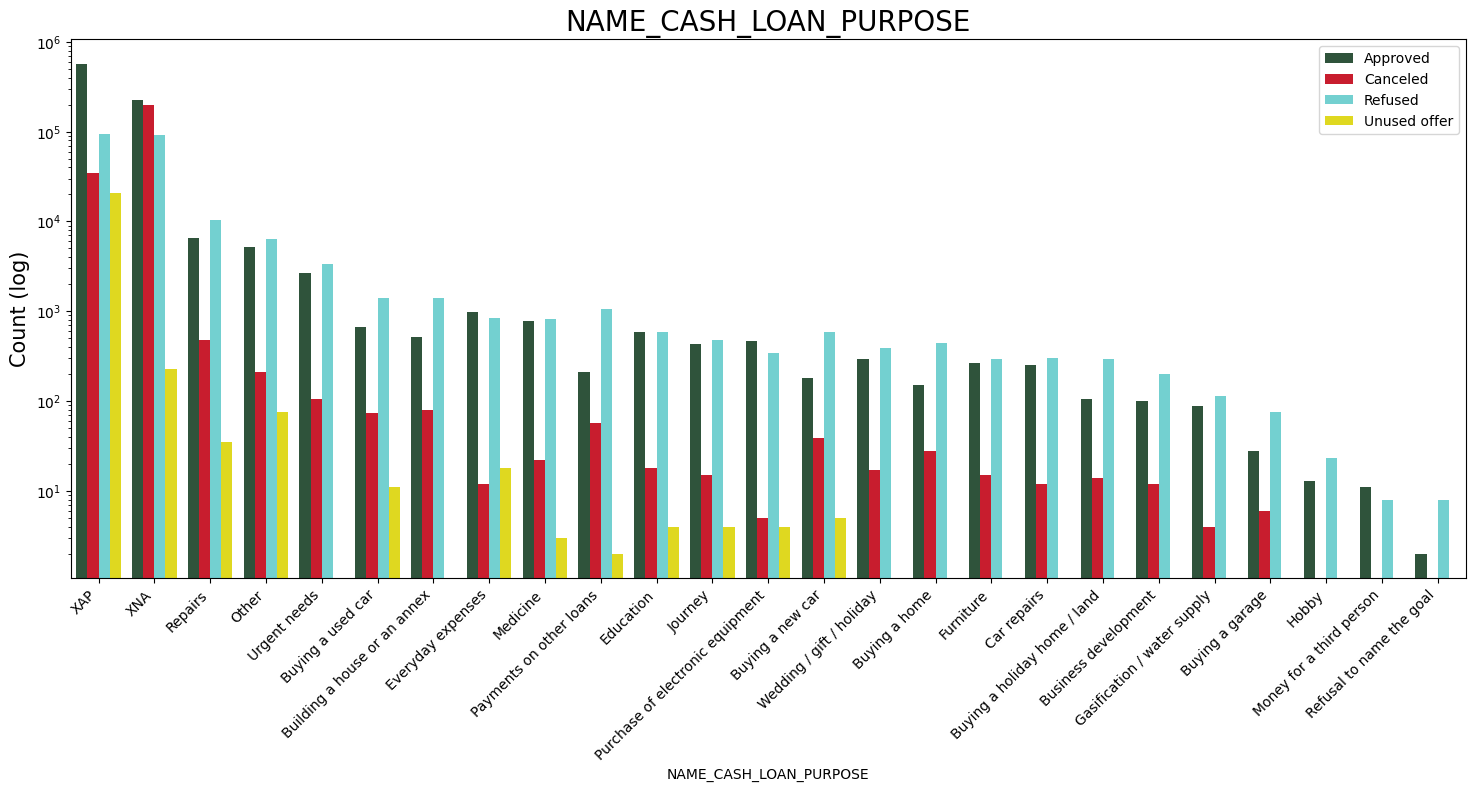

In [441]:
univariate_c_merged('NAME_CASH_LOAN_PURPOSE',L0,'NAME_CONTRACT_STATUS',["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

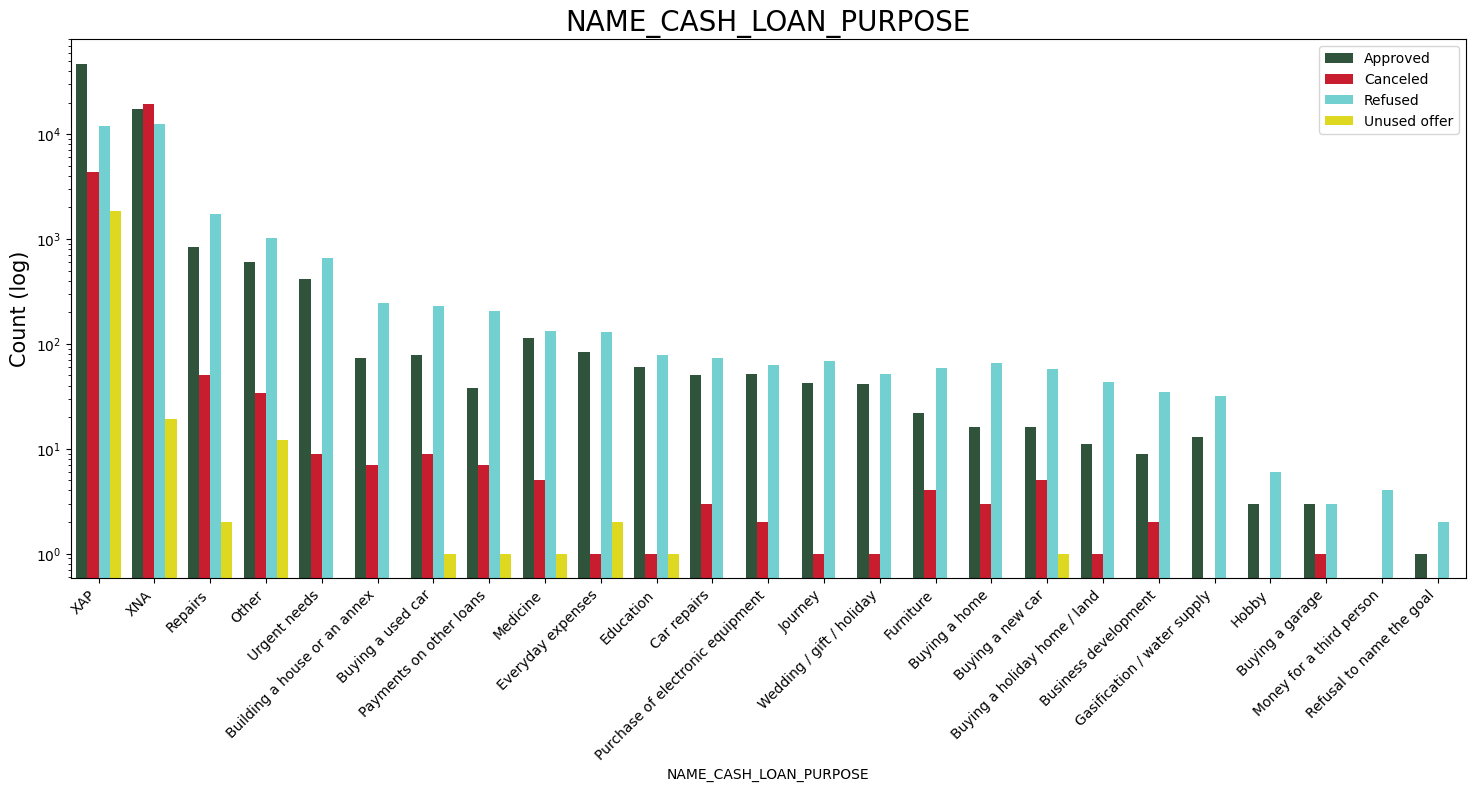

In [439]:
univariate_c_merged('NAME_CASH_LOAN_PURPOSE',L1,'NAME_CONTRACT_STATUS',["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

**Insight:**
- Loans purpose have a high number of unknown values (XAP,XNA)
- Loan for Repair has the highest default rate
- Huge number of loan taken for Repair and Other are refused by bank. We can see that bank considerd those purposes are high risk, or the interest for these loan are not good enough for the clients, so they refuse the loan

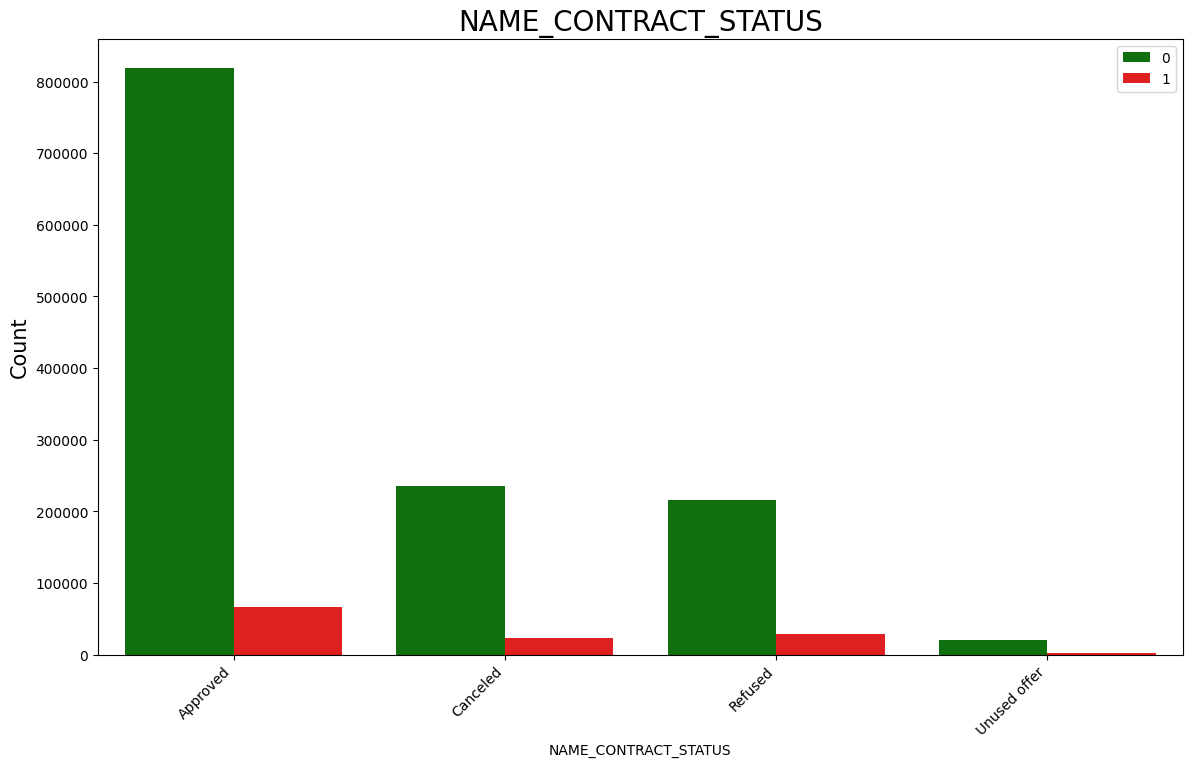

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [442]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

**Insight***:
- 90% of the prev cancelled clients have repaid the loan. Revising the interest rate would increase the business opportunity for these clients
- 88% of the clients who have been refused a loan has paid back the loan in the current case
- Refusal reasons should be recorded for futher analysis, and from these we could turn them into potential clients

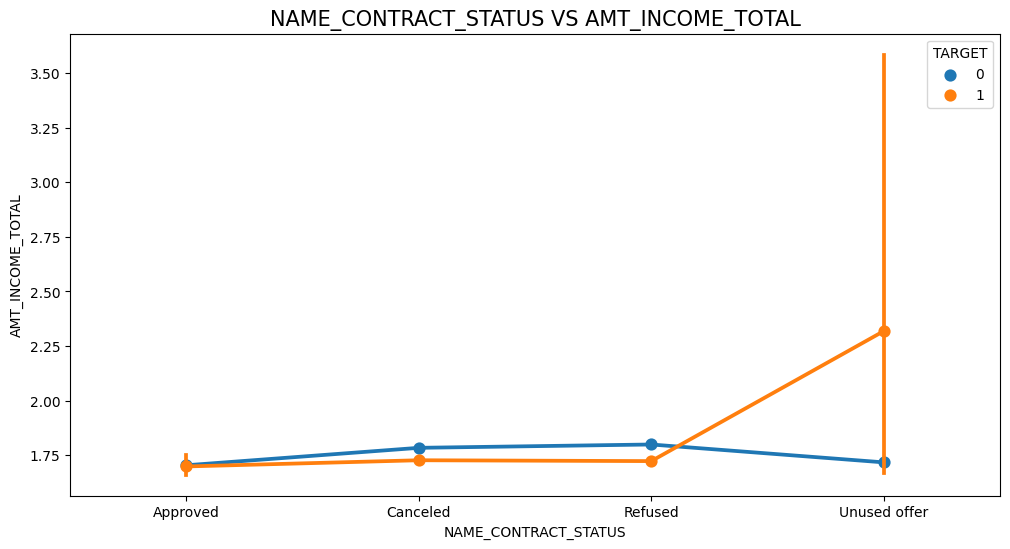

In [443]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**Insight:**
- The pairplot shows that people who have unused offer have defaulted even when the avg income is higher than others.

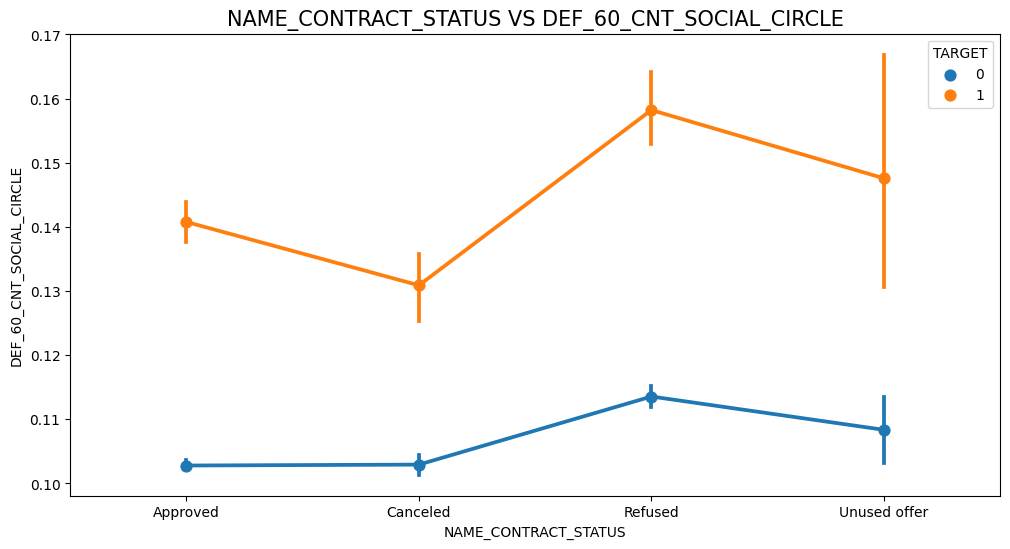

In [444]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Insight**:
- Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.

## 8. Conclusion

Summing up the analysis

After analyzing the dataset, we could use some insight as wel as below:

## 8.1. Decisive factor whether an applicant will be Repayer
1. NAME_EDUCATION_TYPE: Academic degree has less defaults.
2. NAME_INCOME_TYPE: Student and Businessmen have no defaults.
3. REGION_RATING_CLIENT: RATING 1 is safer.
4. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%
5. DAYS_BIRTH: People above age of 50 have low probability of defaulting
6. DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
7. AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
8. NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
9. CNT_CHILDREN: People with zero to two children tend to repay the loans.

## 8.2. Decisive factor whether an applicant will be Defaulter
1. CODE_GENDER: Men are at relatively higher default rate
2. NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
3. NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
4. NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
5. REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
6. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.
7. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
8. DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting
9. DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
10. CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
11. AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.

## 8.3. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:
1. NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.
2. AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.
3. AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.
4. CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.
5. NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.

## 8.4. Suggestions:
1. 90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
2. 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.